# Figure generation

In [1]:
figdir = 'gg_210626_fig'

In [2]:
result_filedir = 'gg_210623_result_files'

In [3]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

In [88]:
# a e s t h e t i c s

#all
col_gold = [203/255,197/255,149/255]
col_gray = [116/255,112/255,113/255]
col_red = [212/255,107/255,75/255]

### SI figures
ms = 0.7
lw = ms
ms_fail = 1
alf = 0.3
alf_fail = 0.5
sifig_aesth = (ms,lw,ms_fail,alf,alf_fail)

### Body figures
ms = 2
lw = ms
ms_fail = 2
alf = 0.3
alf_fail = 0.8
msfig_aesth = (ms,lw,ms_fail,alf,alf_fail)

In [21]:
import matplotlib.pyplot as plt
import pickle
import re

In [6]:
import sys
sys.path.append('../velocity-parameter-estimation/')
from seq_cme_inference import *

## Import datasets.

In [7]:
dataset_names =  ['pbmc_1k','pbmc_10k','heart_1k','heart_10k','neuron_1k','neuron_10k','brain_5k','brain_nuc_5k']+['allen_B01','allen_C01','allen_A08','allen_B08']

In [8]:
loom_filenames = ['/home/ggorin/count_data/loom_10x_kb/'+x+'_v3.loom' for x in dataset_names[:6]]\
    +['/home/ggorin/count_data/loom_10x_kb/'+x+'.loom' for x in dataset_names[6:8]]\
    +['/home/ggorin/count_data/loom_allen_kb/'+x+'_raw.loom' for x in dataset_names[8:]]

In [9]:
loom_filenames

['/home/ggorin/count_data/loom_10x_kb/pbmc_1k_v3.loom',
 '/home/ggorin/count_data/loom_10x_kb/pbmc_10k_v3.loom',
 '/home/ggorin/count_data/loom_10x_kb/heart_1k_v3.loom',
 '/home/ggorin/count_data/loom_10x_kb/heart_10k_v3.loom',
 '/home/ggorin/count_data/loom_10x_kb/neuron_1k_v3.loom',
 '/home/ggorin/count_data/loom_10x_kb/neuron_10k_v3.loom',
 '/home/ggorin/count_data/loom_10x_kb/brain_5k.loom',
 '/home/ggorin/count_data/loom_10x_kb/brain_nuc_5k.loom',
 '/home/ggorin/count_data/loom_allen_kb/allen_B01_raw.loom',
 '/home/ggorin/count_data/loom_allen_kb/allen_C01_raw.loom',
 '/home/ggorin/count_data/loom_allen_kb/allen_A08_raw.loom',
 '/home/ggorin/count_data/loom_allen_kb/allen_B08_raw.loom']

In [10]:
loomind = np.arange(len(loom_filenames))
transcriptome_filenames=['gg_200525_genome_polyA_cum_3']*2+['gg_200524_mouse_genome_polyA_cum_1']*10

In [65]:
def plot_gene_trends(loom_filepaths,ax_s,ax_u,feat_dict,viz=False,
                          results_to_exclude=[],seed=6,n_gen=10,
                          filt_param=(0.01,0.01,350,350,4,4),aesthetics=((12,4),0.15,3,"Spectral"),
                            attr_names_in=['spliced','unspliced','Gene','CellID']):
    sz,alf,ptsz,cmap = aesthetics

    n_datasets = len(loom_filepaths)

    for i_data in range(n_datasets):
        #load in the loom file,
        loom_filepath = loom_filepaths[i_data]
        if all(isinstance(x, list) for x in attr_names_in):
            attr_names = attr_names_in[i_data]
        else:
            attr_names = attr_names_in

        S,U,gene_names,Ncells = import_vlm(loom_filepath,*attr_names)
        ann_filt = identify_annotated_genes(gene_names,feat_dict)
        S = S[ann_filt,:]
        U = U[ann_filt,:]
        gene_names = gene_names[ann_filt]

        S_mean = np.mean(S,1)
        U_mean = np.mean(U,1)        

        #compute the lengths of each gene in filtered matrix
        len_arr = np.asarray([feat_dict[k] for k in gene_names])

        #compute clusters for easy identification of low-expression genes
        LAB = compute_cluster_labels(len_arr,S_mean)
        filt = LAB==0
        
        list_rej = gene_names[filt]
        
        #plot all genes, color by cluster: orange for high expression, grey for low.
        if viz:
            var_name = ('S','U')
            var_arr = ('S_mean','U_mean')

            ax_s.scatter(np.log10(len_arr[filt]), np.log10(S_mean[filt] + 0.001),s=ptsz,
                        color=col_gray,alpha=alf)
            ax_u.scatter(np.log10(len_arr[filt]), np.log10(U_mean[filt] + 0.001),s=ptsz,
                        color=col_gray,alpha=alf)
            ax_s.scatter(np.log10(len_arr[~filt]), np.log10(S_mean[~filt] + 0.001),s=ptsz,
                        color=col_red,alpha=alf)
            ax_u.scatter(np.log10(len_arr[~filt]), np.log10(U_mean[~filt] + 0.001),s=ptsz,
                        color=col_red,alpha=alf)
            ax_s.set_ylim([-3.1,2.4])
            ax_u.set_ylim([-3.1,2.4])
    ngen = len(gene_names)
    return list_rej,ngen #This assumes we're calling with one and only one argument

In [82]:
def export_list(lst,filename):
    f = open('./'+figdir+'/'+filename+'.txt','w')
    for x in lst:
        f.write(x + '\n')
    f.close()


## Plot trends in the spliced/unspliced averages.

36601 features observed, 36169 match genome annotations. 35727 are unique. 
36601 features observed, 36169 match genome annotations. 35727 are unique. 
32285 features observed, 32005 match genome annotations. 31649 are unique. 
32285 features observed, 32005 match genome annotations. 31649 are unique. 
32285 features observed, 32005 match genome annotations. 31649 are unique. 
32285 features observed, 32005 match genome annotations. 31649 are unique. 
32285 features observed, 32005 match genome annotations. 31649 are unique. 
32285 features observed, 32005 match genome annotations. 31649 are unique. 
32285 features observed, 32005 match genome annotations. 31649 are unique. 
32285 features observed, 32005 match genome annotations. 31649 are unique. 
32285 features observed, 32005 match genome annotations. 31649 are unique. 
32285 features observed, 32005 match genome annotations. 31649 are unique. 


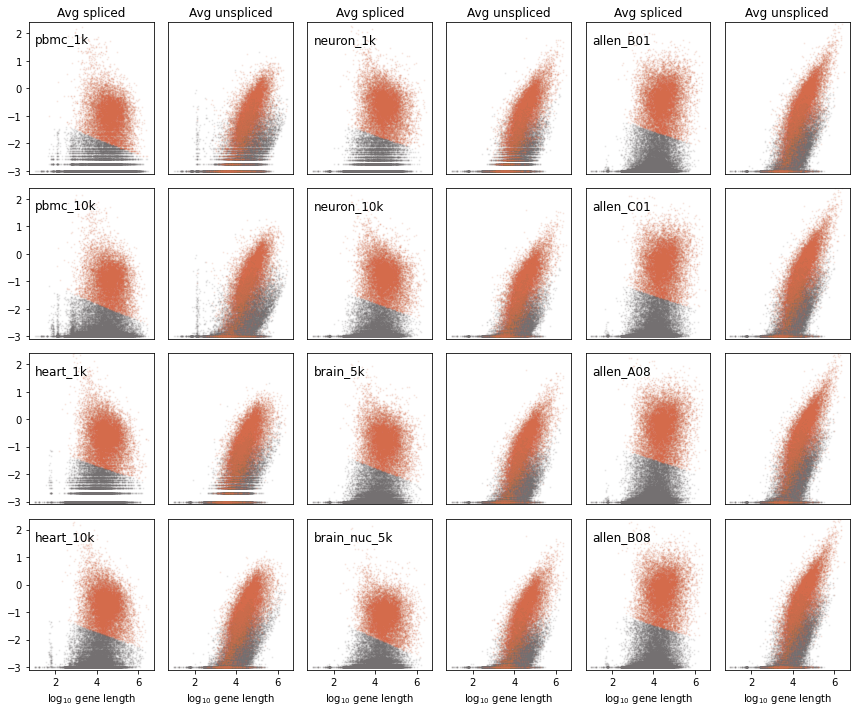

In [16]:
fig1, ax1 = plt.subplots(nrows=4,ncols=6,figsize=(12,10))
for i in loomind:
    len_dict = get_transcriptome(transcriptome_filenames[i])[0] 

    if i<4:
        ax_s = np.unravel_index(i,(4,6),order='F')
    if i>=4 and i<8:
        ax_s = np.unravel_index(i+4,(4,6),order='F')
    if i>=8:
        ax_s = np.unravel_index(i+8,(4,6),order='F')
    ax_u = list(ax_s)
    ax_u[1] += 1
    ax_u = tuple(ax_u)
    _ = plot_gene_trends([loom_filenames[i]],ax1[ax_s],ax1[ax_u],len_dict,viz=True,
                          results_to_exclude=[],seed=6,n_gen=10,
                          filt_param=(0.01,0.01,350,350,4,4),aesthetics=((12,4),0.1,1,"Spectral"),
                            attr_names_in=['spliced','unspliced','gene_name','barcode'])
    if ax_s[0]==3:
        ax1[ax_s].set_xlabel(r'$\log_{10}$ gene length')
        ax1[ax_u].set_xlabel(r'$\log_{10}$ gene length')
    else:
        ax1[ax_s].set_xticks([])
        ax1[ax_u].set_xticks([])
    ax1[ax_s].text(.05,.86,dataset_names[i],transform=ax1[ax_s].transAxes,fontsize=12)
    if ax_s[0]==0:
        ax1[ax_s].set_title('Avg spliced')
        ax1[ax_u].set_title('Avg unspliced')
        
    ax1[ax_u].set_yticks([])
    if ax_s[1] != 0:
        ax1[ax_s].set_yticks([])
fig1.tight_layout()
fig1.savefig('./'+figdir+'/expression_bias.png',dpi=600)

In [73]:
for i in loomind:
    len_dict = get_transcriptome(transcriptome_filenames[i])[0] 
    list_rej,ngen = plot_gene_trends([loom_filenames[i]],ax1[ax_s],ax1[ax_u],len_dict,viz=False,
                          results_to_exclude=[],seed=6,n_gen=10,
                          filt_param=(0.01,0.01,350,350,4,4),aesthetics=((12,4),0.1,1,"Spectral"),
                            attr_names_in=['spliced','unspliced','gene_name','barcode'])
    nrej = len(list_rej)
    nrej_pgen = np.sum([True if re.match(r'((A[CL])|(BX)[0-9]{6}\.[0-9])|(LINC.*)|(C.orf.*)|(.*\-((AS)|(IT)|(ps))[0-9])|(Gm[0-9]{4,5})|(.*Rik)',x) else False for x in list_rej])
    export_list(list_rej,dataset_names[i]+'_rej')
    print('{}: {:.0f} out of {:.0f} genes were rejected ({:.2%}). {:.0f} rejected genes were poorly annotated ({:.2%})'.format(dataset_names[i],nrej,ngen,nrej/ngen,nrej_pgen,nrej_pgen/nrej))

36601 features observed, 36169 match genome annotations. 35727 are unique. 
pbmc_1k: 25024 out of 35727 genes were rejected (70.04%). 14234 rejected genes were poorly annotated (56.88%)
36601 features observed, 36169 match genome annotations. 35727 are unique. 
pbmc_10k: 25016 out of 35727 genes were rejected (70.02%). 14229 rejected genes were poorly annotated (56.88%)
32285 features observed, 32005 match genome annotations. 31649 are unique. 
heart_1k: 18930 out of 31649 genes were rejected (59.81%). 10087 rejected genes were poorly annotated (53.29%)
32285 features observed, 32005 match genome annotations. 31649 are unique. 
heart_10k: 19133 out of 31649 genes were rejected (60.45%). 10179 rejected genes were poorly annotated (53.20%)
32285 features observed, 32005 match genome annotations. 31649 are unique. 
neuron_1k: 19910 out of 31649 genes were rejected (62.91%). 10177 rejected genes were poorly annotated (51.12%)
32285 features observed, 32005 match genome annotations. 31649 a

/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


36601 features observed, 36169 match genome annotations. 35727 are unique. 
32285 features observed, 32005 match genome annotations. 31649 are unique. 
32285 features observed, 32005 match genome annotations. 31649 are unique. 


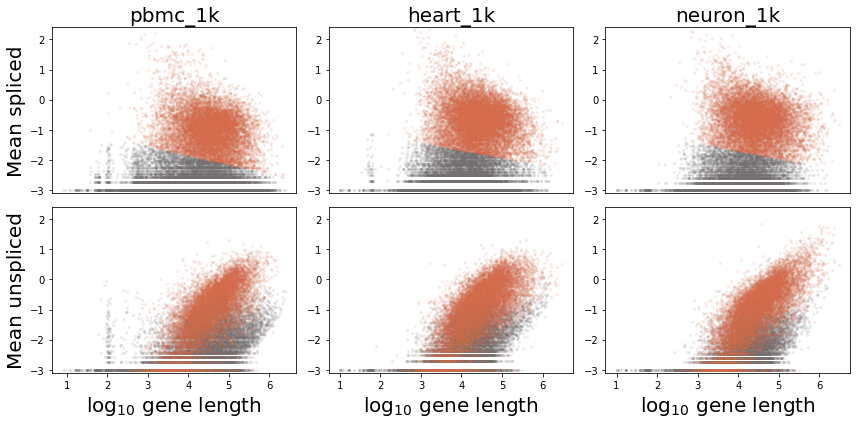

In [14]:
fig1, ax1 = plt.subplots(nrows=2,ncols=3,figsize=(12,6))
j=0
for i in [0,2,4]:
    len_dict = get_transcriptome(transcriptome_filenames[i])[0] 
    ax_s=(0,j)
    ax_u=(1,j)
    plot_gene_trends([loom_filenames[i]],ax1[ax_s],ax1[ax_u],len_dict,viz=True,
                          results_to_exclude=[],seed=6,n_gen=10,
                          filt_param=(0.01,0.01,350,350,4,4),aesthetics=((12,4),0.1,4,"Spectral"),
                            attr_names_in=['spliced','unspliced','gene_name','barcode'])
    
    fs=20
    ax1[ax_s].set_xticks([])
    ax1[ax_u].set_xlabel(r'$\log_{10}$ gene length',fontsize=fs)
    ax1[ax_s].set_title(dataset_names[i],fontsize=fs)
    if j==0:
        ax1[ax_s].set_ylabel('Mean spliced',fontsize=fs)
        ax1[ax_u].set_ylabel('Mean unspliced',fontsize=fs)
    j+= 1
fig1.tight_layout()
fig1.savefig('./'+figdir+'/expression_bias_subset.png',dpi=600)

## Check gene overlaps and filters.

In [15]:
len_dict = get_transcriptome(transcriptome_filenames[0])[0] 
_=select_gene_set(loom_filenames[:2],len_dict,viz=False,
                      results_to_exclude=[],seed=6,n_gen=10,
                      filt_param=(0.01,0.01,350,350,3,3),aesthetics=((12,4),0.15,3,"Spectral"),
                        attr_names_in=['spliced','unspliced','gene_name','barcode'])

/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dataset: /home/ggorin/count_data/loom_10x_kb/pbmc_1k_v3.loom
36601 features observed, 36169 match genome annotations. 35727 are unique. 
1200 cells detected.
10703 genes retained as high-expression.
3087 genes retained in loom structure based on filter.
Gene set size: 3087
-----------
Dataset: /home/ggorin/count_data/loom_10x_kb/pbmc_10k_v3.loom
36601 features observed, 36169 match genome annotations. 35727 are unique. 
11756 cells detected.
10711 genes retained as high-expression.
5813 genes retained in loom structure based on filter.
Gene set size: 2997
-----------
10 genes selected.


In [16]:
len_dict = get_transcriptome(transcriptome_filenames[2])[0] 
_=select_gene_set(loom_filenames[2:6],len_dict,viz=False,
                      results_to_exclude=[],seed=6,n_gen=10,
                      filt_param=(0.01,0.01,350,350,3,3),aesthetics=((12,4),0.15,3,"Spectral"),
                        attr_names_in=['spliced','unspliced','gene_name','barcode'])

/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dataset: /home/ggorin/count_data/loom_10x_kb/heart_1k_v3.loom
32285 features observed, 32005 match genome annotations. 31649 are unique. 
982 cells detected.
12719 genes retained as high-expression.
6746 genes retained in loom structure based on filter.
Gene set size: 6746
-----------
Dataset: /home/ggorin/count_data/loom_10x_kb/heart_10k_v3.loom
32285 features observed, 32005 match genome annotations. 31649 are unique. 
7462 cells detected.
12516 genes retained as high-expression.
8281 genes retained in loom structure based on filter.
Gene set size: 6435
-----------
Dataset: /home/ggorin/count_data/loom_10x_kb/neuron_1k_v3.loom
32285 features observed, 32005 match genome annotations. 31649 are unique. 
1330 cells detected.
11739 genes retained as high-expression.
4943 genes retained in loom structure based on filter.
Gene set size: 3997
-----------
Dataset: /home/ggorin/count_data/loom_10x_kb/neuron_10k_v3.loom
32285 features observed, 32005 match genome annotations. 31649 are unique.

In [23]:
len_dict = get_transcriptome(transcriptome_filenames[6])[0] 
_=select_gene_set(loom_filenames[6:8],len_dict,viz=False,
                      results_to_exclude=[],seed=6,n_gen=10,
                      filt_param=(0.01,0.01,350,350,3,3),attr_names_in=['spliced','unspliced','gene_name','barcode'])

/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dataset: /home/ggorin/count_data/loom_10x_kb/brain_5k.loom
32285 features observed, 32005 match genome annotations. 31649 are unique. 
5399 cells detected.
11438 genes retained as high-expression.
5370 genes retained in loom structure based on filter.
Gene set size: 5370
-----------
Dataset: /home/ggorin/count_data/loom_10x_kb/brain_nuc_5k.loom
32285 features observed, 32005 match genome annotations. 31649 are unique. 
5772 cells detected.
11201 genes retained as high-expression.
5854 genes retained in loom structure based on filter.
Gene set size: 4775
-----------
10 genes selected.


In [24]:
len_dict = get_transcriptome(transcriptome_filenames[8])[0] 
_=select_gene_set(loom_filenames[8:],len_dict,viz=False,
                      results_to_exclude=[],seed=6,n_gen=10,
                      filt_param=(0.01,0.01,350,350,3,3),attr_names_in=['spliced','unspliced','gene_name','barcode'])


/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dataset: /home/ggorin/count_data/loom_allen_kb/allen_B01_raw.loom
32285 features observed, 32005 match genome annotations. 31649 are unique. 
11504 cells detected.
11944 genes retained as high-expression.
7595 genes retained in loom structure based on filter.
Gene set size: 7595
-----------
Dataset: /home/ggorin/count_data/loom_allen_kb/allen_C01_raw.loom
32285 features observed, 32005 match genome annotations. 31649 are unique. 
12363 cells detected.
12082 genes retained as high-expression.
8154 genes retained in loom structure based on filter.
Gene set size: 7244
-----------
Dataset: /home/ggorin/count_data/loom_allen_kb/allen_A08_raw.loom
32285 features observed, 32005 match genome annotations. 31649 are unique. 
9974 cells detected.
12432 genes retained as high-expression.
8812 genes retained in loom structure based on filter.
Gene set size: 7106
-----------
Dataset: /home/ggorin/count_data/loom_allen_kb/allen_B08_raw.loom
32285 features observed, 32005 match genome annotations. 31

## Investigate noise-free fit result.

In [76]:
result_files = [\
                'gg_210610_pbmc_1k_v3_40x41_2500gen_1',\
                'gg_210610_pbmc_10k_v3_40x41_2500gen_1',\
                'gg_210610_heart_1k_v3_40x41_2500gen_1',\
                'gg_210610_heart_10k_v3_40x41_2500gen_1',\
                'gg_210610_neuron_1k_v3_40x41_2500gen_1',\
                'gg_210610_neuron_10k_v3_40x41_2500gen_1',\
                'gg_210622_brain_5k_40x41_3500gen_1',\
                'gg_210622_brain_nuc_5k_40x41_3500gen_1',\
                'gg_210610_allen_B01_raw_40x41_5000gen_1',\
                'gg_210611_allen_C01_raw_40x41_5000gen_1',\
                'gg_210611_allen_A08_raw_40x41_5000gen_1',\
                'gg_210612_allen_B08_raw_40x41_5000gen_1',\
               ]

It's impractical to evaluate all error bars and chi-square tests at runtime. Let's precompute them. (Some will inevitably fail.)

In [35]:
for i in loomind:
    result_data = import_datasets([result_files[i]+'/result.pickle'])
    result_data.find_best_params()
    #compute chi-square test rejections at sampling parameter optimum
    chisq_gen(result_data,viz=False,nosamp=False)
    chisq_gen(result_data,viz=False,nosamp=True)
    #compute error bars
    compute_sigma(result_data,nosamp=False)
    compute_sigma(result_data,nosamp=True)
    pickle.dump(result_data,open('./'+result_filedir+'/'+result_files[i]+'.pickle','wb'))

../velocity-parameter-estimation/seq_cme_inference.py:384: RuntimeWarning: invalid value encountered in sqrt
  errorbars[i,:] = c*np.sqrt(np.diag(hess_inv))/np.sqrt(result_data.Ncells)


Parameter set 769 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1054 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1468 gives negative stdev; replaced with mean. (Search converged to local minimum?)


../velocity-parameter-estimation/seq_cme_inference.py:384: RuntimeWarning: invalid value encountered in sqrt
  errorbars[i,:] = c*np.sqrt(np.diag(hess_inv))/np.sqrt(result_data.Ncells)


Parameter set 84 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 204 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1131 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1443 ran into singularity; replaced with mean. (Search converged to local minimum?) 
Parameter set 1592 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1788 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1847 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 2073 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 2102 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 2146 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 2237 giv

<ipython-input-35-436765966b2c>:8: ResourceWarning: unclosed file <_io.BufferedWriter name='./gg_210623_result_files/gg_210610_pbmc_1k_v3_40x41_2500gen_1.pickle'>
  pickle.dump(result_data,open('./'+result_filedir+'/'+result_files[i]+'.pickle','wb'))
../velocity-parameter-estimation/seq_cme_inference.py:384: RuntimeWarning: invalid value encountered in sqrt
  errorbars[i,:] = c*np.sqrt(np.diag(hess_inv))/np.sqrt(result_data.Ncells)


Parameter set 1476 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1638 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1869 gives negative stdev; replaced with mean. (Search converged to local minimum?)


../velocity-parameter-estimation/seq_cme_inference.py:384: RuntimeWarning: invalid value encountered in sqrt
  errorbars[i,:] = c*np.sqrt(np.diag(hess_inv))/np.sqrt(result_data.Ncells)


Parameter set 1259 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1443 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1946 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 2302 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 2433 ran into singularity; replaced with mean. (Search converged to local minimum?) 


<ipython-input-35-436765966b2c>:8: ResourceWarning: unclosed file <_io.BufferedWriter name='./gg_210623_result_files/gg_210610_pbmc_10k_v3_40x41_2500gen_1.pickle'>
  pickle.dump(result_data,open('./'+result_filedir+'/'+result_files[i]+'.pickle','wb'))
../velocity-parameter-estimation/seq_cme_inference.py:384: RuntimeWarning: invalid value encountered in sqrt
  errorbars[i,:] = c*np.sqrt(np.diag(hess_inv))/np.sqrt(result_data.Ncells)


Parameter set 2479 gives negative stdev; replaced with mean. (Search converged to local minimum?)


../velocity-parameter-estimation/seq_cme_inference.py:384: RuntimeWarning: invalid value encountered in sqrt
  errorbars[i,:] = c*np.sqrt(np.diag(hess_inv))/np.sqrt(result_data.Ncells)


Parameter set 31 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 45 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 127 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 130 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 239 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 265 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 294 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 683 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 686 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 750 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 840 gives negative

<ipython-input-35-436765966b2c>:8: ResourceWarning: unclosed file <_io.BufferedWriter name='./gg_210623_result_files/gg_210610_heart_1k_v3_40x41_2500gen_1.pickle'>
  pickle.dump(result_data,open('./'+result_filedir+'/'+result_files[i]+'.pickle','wb'))
../velocity-parameter-estimation/seq_cme_inference.py:384: RuntimeWarning: invalid value encountered in sqrt
  errorbars[i,:] = c*np.sqrt(np.diag(hess_inv))/np.sqrt(result_data.Ncells)


Parameter set 1709 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1842 gives negative stdev; replaced with mean. (Search converged to local minimum?)


../velocity-parameter-estimation/seq_cme_inference.py:384: RuntimeWarning: invalid value encountered in sqrt
  errorbars[i,:] = c*np.sqrt(np.diag(hess_inv))/np.sqrt(result_data.Ncells)


Parameter set 581 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 840 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1842 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1933 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 2115 gives negative stdev; replaced with mean. (Search converged to local minimum?)


<ipython-input-35-436765966b2c>:8: ResourceWarning: unclosed file <_io.BufferedWriter name='./gg_210623_result_files/gg_210610_heart_10k_v3_40x41_2500gen_1.pickle'>
  pickle.dump(result_data,open('./'+result_filedir+'/'+result_files[i]+'.pickle','wb'))
../velocity-parameter-estimation/seq_cme_inference.py:384: RuntimeWarning: invalid value encountered in sqrt
  errorbars[i,:] = c*np.sqrt(np.diag(hess_inv))/np.sqrt(result_data.Ncells)


Parameter set 411 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 774 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 950 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1146 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1272 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1680 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1933 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1947 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 2035 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 2428 gives negative stdev; replaced with mean. (Search converged to local minimum?)


../velocity-parameter-estimation/seq_cme_inference.py:384: RuntimeWarning: invalid value encountered in sqrt
  errorbars[i,:] = c*np.sqrt(np.diag(hess_inv))/np.sqrt(result_data.Ncells)


Parameter set 225 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 411 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 424 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 515 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 643 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 723 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 774 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 950 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 951 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1017 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1062 gives nega

<ipython-input-35-436765966b2c>:8: ResourceWarning: unclosed file <_io.BufferedWriter name='./gg_210623_result_files/gg_210610_neuron_1k_v3_40x41_2500gen_1.pickle'>
  pickle.dump(result_data,open('./'+result_filedir+'/'+result_files[i]+'.pickle','wb'))
../velocity-parameter-estimation/seq_cme_inference.py:384: RuntimeWarning: invalid value encountered in sqrt
  errorbars[i,:] = c*np.sqrt(np.diag(hess_inv))/np.sqrt(result_data.Ncells)


Parameter set 950 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1377 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 2035 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 2114 gives negative stdev; replaced with mean. (Search converged to local minimum?)


../velocity-parameter-estimation/seq_cme_inference.py:384: RuntimeWarning: invalid value encountered in sqrt
  errorbars[i,:] = c*np.sqrt(np.diag(hess_inv))/np.sqrt(result_data.Ncells)


Parameter set 175 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 349 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 365 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 597 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 643 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 781 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 899 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 901 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 950 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 961 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1206 gives negat

<ipython-input-35-436765966b2c>:8: ResourceWarning: unclosed file <_io.BufferedWriter name='./gg_210623_result_files/gg_210610_neuron_10k_v3_40x41_2500gen_1.pickle'>
  pickle.dump(result_data,open('./'+result_filedir+'/'+result_files[i]+'.pickle','wb'))
../velocity-parameter-estimation/seq_cme_inference.py:384: RuntimeWarning: invalid value encountered in sqrt
  errorbars[i,:] = c*np.sqrt(np.diag(hess_inv))/np.sqrt(result_data.Ncells)


Parameter set 440 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 626 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 693 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1636 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1877 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 2194 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 2631 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 2844 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 3168 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 3488 gives negative stdev; replaced with mean. (Search converged to local minimum?)


../velocity-parameter-estimation/seq_cme_inference.py:384: RuntimeWarning: invalid value encountered in sqrt
  errorbars[i,:] = c*np.sqrt(np.diag(hess_inv))/np.sqrt(result_data.Ncells)


Parameter set 21 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 321 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 377 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 440 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 454 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 469 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 499 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 693 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 874 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1030 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1032 gives negat

<ipython-input-35-436765966b2c>:8: ResourceWarning: unclosed file <_io.BufferedWriter name='./gg_210623_result_files/gg_210622_brain_5k_40x41_3500gen_1.pickle'>
  pickle.dump(result_data,open('./'+result_filedir+'/'+result_files[i]+'.pickle','wb'))
../velocity-parameter-estimation/seq_cme_inference.py:384: RuntimeWarning: invalid value encountered in sqrt
  errorbars[i,:] = c*np.sqrt(np.diag(hess_inv))/np.sqrt(result_data.Ncells)


Parameter set 667 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 693 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 2061 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 3488 gives negative stdev; replaced with mean. (Search converged to local minimum?)


../velocity-parameter-estimation/seq_cme_inference.py:384: RuntimeWarning: invalid value encountered in sqrt
  errorbars[i,:] = c*np.sqrt(np.diag(hess_inv))/np.sqrt(result_data.Ncells)


Parameter set 166 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 381 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 544 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 906 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1030 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1677 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1852 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1940 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 2098 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 2353 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 2609 gives

<ipython-input-35-436765966b2c>:8: ResourceWarning: unclosed file <_io.BufferedWriter name='./gg_210623_result_files/gg_210622_brain_nuc_5k_40x41_3500gen_1.pickle'>
  pickle.dump(result_data,open('./'+result_filedir+'/'+result_files[i]+'.pickle','wb'))
../velocity-parameter-estimation/seq_cme_inference.py:384: RuntimeWarning: invalid value encountered in sqrt
  errorbars[i,:] = c*np.sqrt(np.diag(hess_inv))/np.sqrt(result_data.Ncells)


Parameter set 275 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 489 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 2811 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 3286 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 4653 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 4866 gives negative stdev; replaced with mean. (Search converged to local minimum?)


../velocity-parameter-estimation/seq_cme_inference.py:384: RuntimeWarning: invalid value encountered in sqrt
  errorbars[i,:] = c*np.sqrt(np.diag(hess_inv))/np.sqrt(result_data.Ncells)


Parameter set 275 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 742 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 836 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 871 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 922 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 955 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1571 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1680 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1817 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1922 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 2077 gives n

<ipython-input-35-436765966b2c>:8: ResourceWarning: unclosed file <_io.BufferedWriter name='./gg_210623_result_files/gg_210610_allen_B01_raw_40x41_5000gen_1.pickle'>
  pickle.dump(result_data,open('./'+result_filedir+'/'+result_files[i]+'.pickle','wb'))
../velocity-parameter-estimation/seq_cme_inference.py:384: RuntimeWarning: invalid value encountered in sqrt
  errorbars[i,:] = c*np.sqrt(np.diag(hess_inv))/np.sqrt(result_data.Ncells)


Parameter set 2811 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 3286 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 535 ran into singularity; replaced with mean. (Search converged to local minimum?) 
Parameter set 633 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1120 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1338 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1571 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1680 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1922 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 2216 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 2278 gi

../velocity-parameter-estimation/seq_cme_inference.py:384: RuntimeWarning: invalid value encountered in sqrt
  errorbars[i,:] = c*np.sqrt(np.diag(hess_inv))/np.sqrt(result_data.Ncells)
<ipython-input-35-436765966b2c>:8: ResourceWarning: unclosed file <_io.BufferedWriter name='./gg_210623_result_files/gg_210611_allen_C01_raw_40x41_5000gen_1.pickle'>
  pickle.dump(result_data,open('./'+result_filedir+'/'+result_files[i]+'.pickle','wb'))
../velocity-parameter-estimation/seq_cme_inference.py:384: RuntimeWarning: invalid value encountered in sqrt
  errorbars[i,:] = c*np.sqrt(np.diag(hess_inv))/np.sqrt(result_data.Ncells)


Parameter set 2527 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 2543 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 2811 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 2944 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 3286 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 4109 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 4683 gives negative stdev; replaced with mean. (Search converged to local minimum?)


../velocity-parameter-estimation/seq_cme_inference.py:384: RuntimeWarning: invalid value encountered in sqrt
  errorbars[i,:] = c*np.sqrt(np.diag(hess_inv))/np.sqrt(result_data.Ncells)


Parameter set 554 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 742 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 903 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1050 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1062 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1120 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1184 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1391 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1571 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1680 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1817 give

<ipython-input-35-436765966b2c>:8: ResourceWarning: unclosed file <_io.BufferedWriter name='./gg_210623_result_files/gg_210611_allen_A08_raw_40x41_5000gen_1.pickle'>
  pickle.dump(result_data,open('./'+result_filedir+'/'+result_files[i]+'.pickle','wb'))
../velocity-parameter-estimation/seq_cme_inference.py:384: RuntimeWarning: invalid value encountered in sqrt
  errorbars[i,:] = c*np.sqrt(np.diag(hess_inv))/np.sqrt(result_data.Ncells)


Parameter set 2077 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 3286 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 4400 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 4683 gives negative stdev; replaced with mean. (Search converged to local minimum?)


../velocity-parameter-estimation/seq_cme_inference.py:384: RuntimeWarning: invalid value encountered in sqrt
  errorbars[i,:] = c*np.sqrt(np.diag(hess_inv))/np.sqrt(result_data.Ncells)


Parameter set 109 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 742 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 903 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1324 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1680 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1922 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 1981 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 2214 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 2216 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 2351 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 2463 give

<ipython-input-35-436765966b2c>:8: ResourceWarning: unclosed file <_io.BufferedWriter name='./gg_210623_result_files/gg_210612_allen_B08_raw_40x41_5000gen_1.pickle'>
  pickle.dump(result_data,open('./'+result_filedir+'/'+result_files[i]+'.pickle','wb'))


In [86]:
def import_precomputed_(filestring,result_filedir):
    with open('./'+result_filedir+'/'+filestring+'.pickle','rb') as f:
        precomp = pickle.load(f)
    return precomp

In [85]:
def check_at_bounds(result_data,phys_params,thr=0.01):
    x = np.any(np.logical_or(
        result_data.search_params.lb_log+thr > phys_params,
        result_data.search_params.ub_log-thr < phys_params) ,1)
    return x

In [ ]:
for i in loomind:
    result_data = import_precomputed_(result_files[i],result_filedir)
    export_list(result_data.gene_names,dataset_names[i])

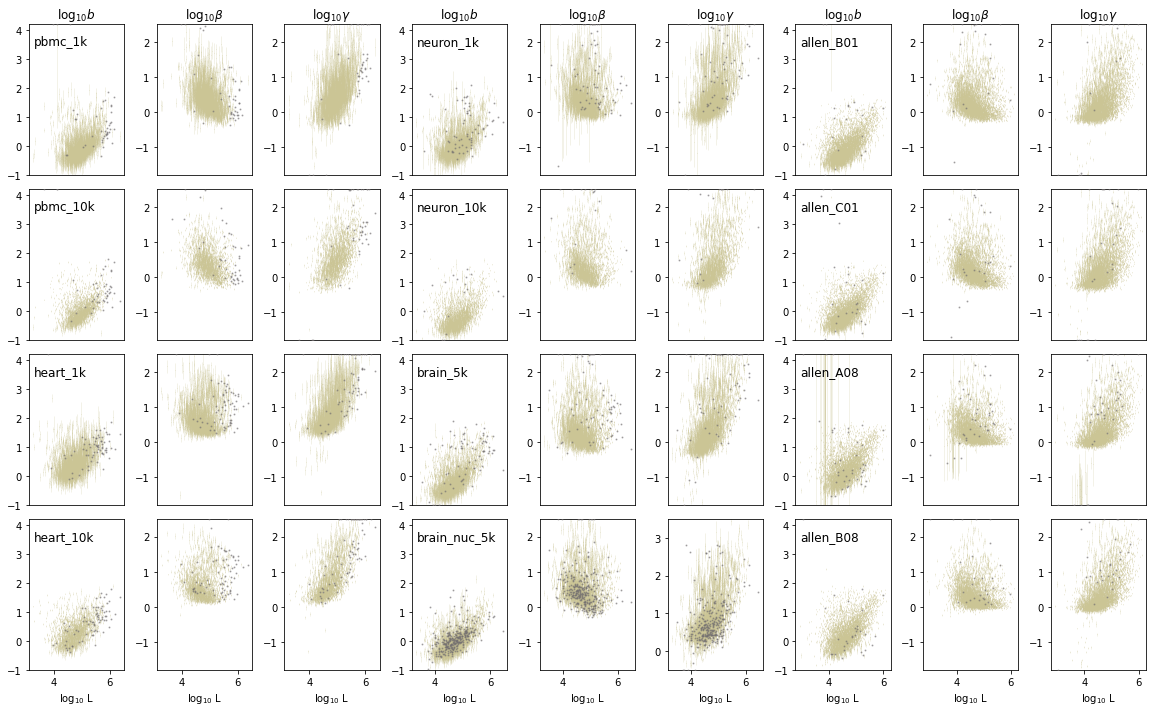

In [20]:
ms,lw,ms_fail,alf,alf_fail = sifig_aesth
fig1, ax1 = plt.subplots(nrows=4,ncols=9,figsize=(16,10))
for i in loomind:
    result_data = import_precomputed_(result_files[i],result_filedir)

    if i<4:
        ax_b = np.unravel_index(i,(4,9),order='F')
    if i>=4 and i<8:
        ax_b = np.unravel_index(i+8,(4,9),order='F')
    if i>=8:
        ax_b = np.unravel_index(i+16,(4,9),order='F')
    ax_beta = list(ax_b)
    ax_beta[1] += 1
    ax_beta = tuple(ax_beta)
    ax_gamma = list(ax_b)
    ax_gamma[1] += 2
    ax_gamma = tuple(ax_gamma)

    bind,_,_,phys_params,_,gene_log_lengths,errorbars = get_result_data(result_data,chisq_correct=False,nosamp=True,get_errorbars=True)
    
    filt = result_data.gene_rej_nosamp | check_at_bounds(result_data,phys_params)
    
    errorbars *=2.576
    ax_ = [ax_b,ax_beta,ax_gamma]
    for j in range(3):
        ax1[ax_[j]].errorbar(gene_log_lengths[~filt],
            phys_params[~filt,j],
            errorbars[~filt,j],marker='_',c=col_gold,alpha=alf,linestyle='None',linewidth=lw,zorder=-100,ms=ms)
        ax1[ax_[j]].scatter(gene_log_lengths[filt],phys_params[filt,j],color=col_gray,alpha=alf_fail,s=ms_fail,zorder=100)
        ax1[ax_[j]].set_ylim([result_data.search_params.lb_log[j],result_data.search_params.ub_log[j]])
    if ax_[0][0]==3:
        for j in range(3):
            ax1[ax_[j]].set_xlabel(r'$\log_{10}$ L')
    else:
        for j in range(3):
            ax1[ax_[j]].set_xticks([])
    ax1[ax_[0]].text(.05,.86,dataset_names[i],transform=ax1[ax_[0]].transAxes,fontsize=12)
    
    param_nm = (r'$\log_{10} b$',r'$\log_{10} \beta$',r'$\log_{10} \gamma$')
    if ax_[0][0] == 0:
        for j in range(3):
            ax1[ax_[j]].set_title(param_nm[j])
        
fig1.tight_layout()
fig1.savefig('./'+figdir+'/naive_fit.png',dpi=600)

/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


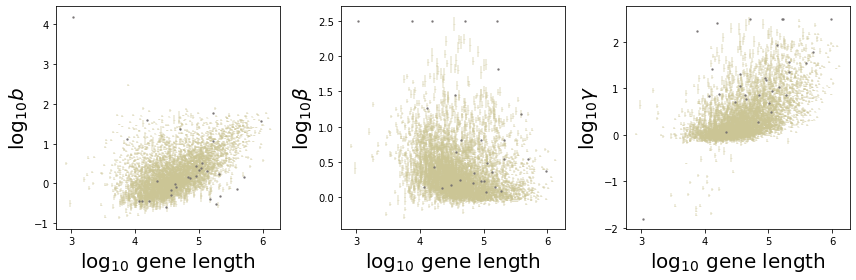

In [21]:
ms,lw,ms_fail,alf,alf_fail = msfig_aesth
fig1, ax1 = plt.subplots(nrows=1,ncols=3,figsize=(12,4))
for j in range(3):
    ax1[j].errorbar(gene_log_lengths[~filt],
        phys_params[~filt,j],
        errorbars[~filt,j],marker='_',ms=ms,c=col_gold,alpha=alf,linestyle='None',linewidth=lw,zorder=-100)
    ax1[j].scatter(gene_log_lengths[filt],phys_params[filt,j],color=col_gray,alpha=alf_fail,s=ms_fail,zorder=100)
    fs=20
    ax1[j].set_ylabel(param_nm[j],fontsize=fs)
    ax1[j].set_xlabel(r'$\log_{10}$ gene length',fontsize=fs)
fig1.tight_layout()
fig1.savefig('./'+figdir+'/allen_naive_fit.png',dpi=600)

## Investigate linear model parameter fits (with the simplest possible gene filtering model)

/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


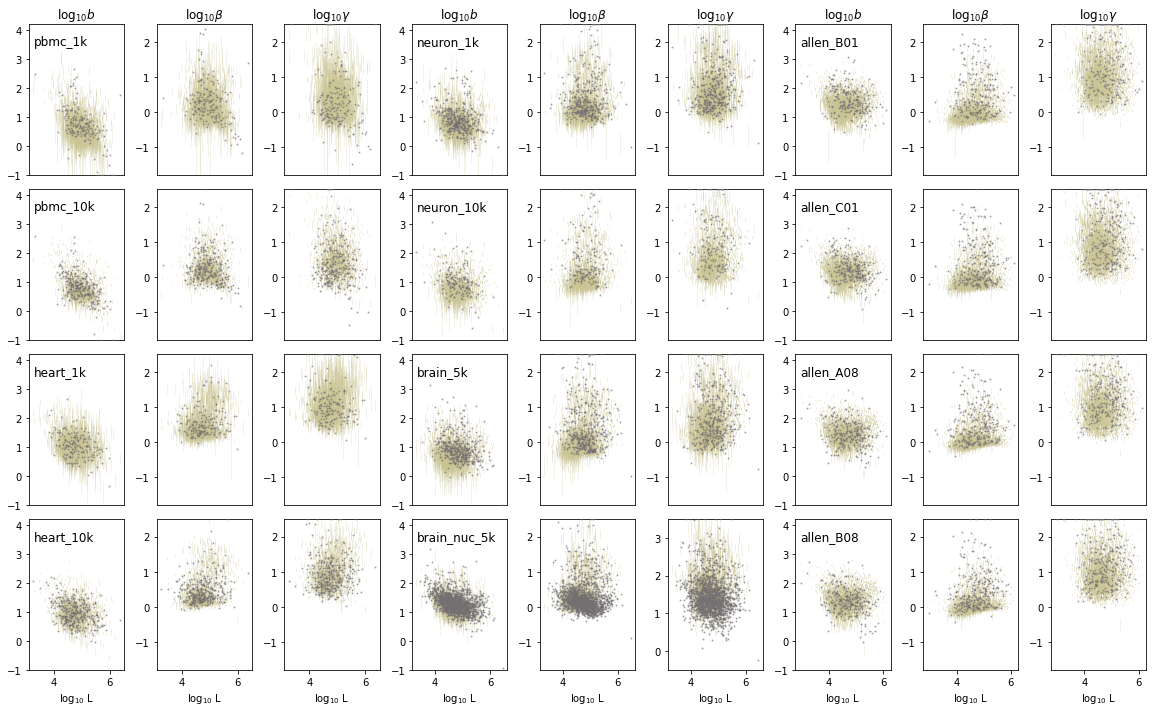

In [22]:
ms,lw,ms_fail,alf,alf_fail = sifig_aesth
fig1, ax1 = plt.subplots(nrows=4,ncols=9,figsize=(16,10))
for i in loomind:    
    result_data = import_precomputed_(result_files[i],result_filedir)
    if i<4:
        ax_b = np.unravel_index(i,(4,9),order='F')
    if i>=4 and i<8:
        ax_b = np.unravel_index(i+8,(4,9),order='F')
    if i>=8:
        ax_b = np.unravel_index(i+16,(4,9),order='F')
    ax_beta = list(ax_b)
    ax_beta[1] += 1
    ax_beta = tuple(ax_beta)
    ax_gamma = list(ax_b)
    ax_gamma[1] += 2
    ax_gamma = tuple(ax_gamma)
    
    bind,_,_,phys_params,_,gene_log_lengths,errorbars = get_result_data(result_data,chisq_correct=False,nosamp=False,get_errorbars=True)
    
    filt = result_data.gene_rej | check_at_bounds(result_data,phys_params)
    errorbars *=2.576

    ax_ = [ax_b,ax_beta,ax_gamma]
    for j in range(3):
        col_ = [203/255,197/255,149/255]
        ax1[ax_[j]].errorbar(gene_log_lengths[~filt],
            phys_params[~filt,j],
            errorbars[~filt,j],marker='_',c=col_gold,alpha=alf,linestyle='None',linewidth=lw,zorder=-100,ms=ms)
        ax1[ax_[j]].scatter(gene_log_lengths[filt],phys_params[filt,j],color=col_gray,alpha=alf_fail,s=ms_fail,zorder=100)
        ax1[ax_[j]].set_ylim([result_data.search_params.lb_log[j],result_data.search_params.ub_log[j]])

    if ax_[0][0]==3:
        for j in range(3):
            ax1[ax_[j]].set_xlabel(r'$\log_{10}$ L')
    else:
        for j in range(3):
            ax1[ax_[j]].set_xticks([])
    ax1[ax_[0]].text(.05,.86,dataset_names[i],transform=ax1[ax_[0]].transAxes,fontsize=12)

    param_nm = (r'$\log_{10} b$',r'$\log_{10} \beta$',r'$\log_{10} \gamma$')
    if ax_[0][0] == 0:
        for j in range(3):
            ax1[ax_[j]].set_title(param_nm[j])
        
fig1.tight_layout()
fig1.savefig('./'+figdir+'/full_fit.png',dpi=600)

/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


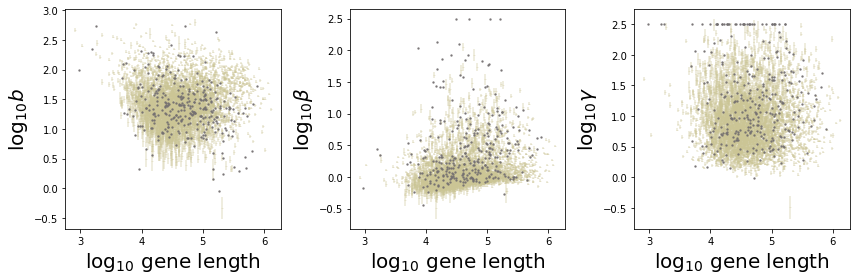

In [23]:
ms,lw,ms_fail,alf,alf_fail = msfig_aesth
fig1, ax1 = plt.subplots(nrows=1,ncols=3,figsize=(12,4))
for j in range(3):
    ax1[j].errorbar(gene_log_lengths[~filt],
        phys_params[~filt,j],
        errorbars[~filt,j],marker='_',ms=ms,c=col_gold,alpha=alf,linestyle='None',linewidth=lw,zorder=-100)
    ax1[j].scatter(gene_log_lengths[filt],phys_params[filt,j],color=col_gray,alpha=alf_fail,s=ms_fail,zorder=100)
    fs=20
    ax1[j].set_ylabel(param_nm[j],fontsize=fs)
    ax1[j].set_xlabel(r'$\log_{10}$ gene length',fontsize=fs)
fig1.tight_layout()
fig1.savefig('./'+figdir+'/allen_full_fit.png',dpi=600)

## Plot likelihood landscapes.

In [24]:
def plot_landscape_(ax, result_data, gene_selection=None, log=True, colorbar=False,levels=40,hideticks=False,cmap='viridis'):
    """
    Landscape visualization function. Plots landscape into axes.
    """
    sz = (result_data.n_pt2,result_data.n_pt1)

    if gene_selection is None:
        DIVG = result_data.divg
    else:
        DIVG = np.sum(result_data.gene_spec_err[:,gene_selection],1)
    if log:
        DIVG = np.log10(DIVG)

    X = np.reshape(result_data.X.T,sz)
    Y = np.reshape(result_data.Y.T,sz)
    Z = np.reshape(DIVG.T,sz)
    contourplot = ax.contourf(X,Y,Z,levels,cmap=cmap)
    if colorbar:
        plt.colorbar(contourplot)
    if hideticks:
        ax.set_xticks([])
        ax.set_yticks([])

/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [92]:
from matplotlib.colors import ListedColormap
c_highlight = col_red
c1 = [173/255,214/255,200/255]
c2 = [59/255,131/255,130/255]
ncol=20
cmap = ListedColormap(np.array([np.linspace(c2[j],c1[j],ncol) for j in range(3)]).T)

In [26]:
PAR = np.zeros((12,2))

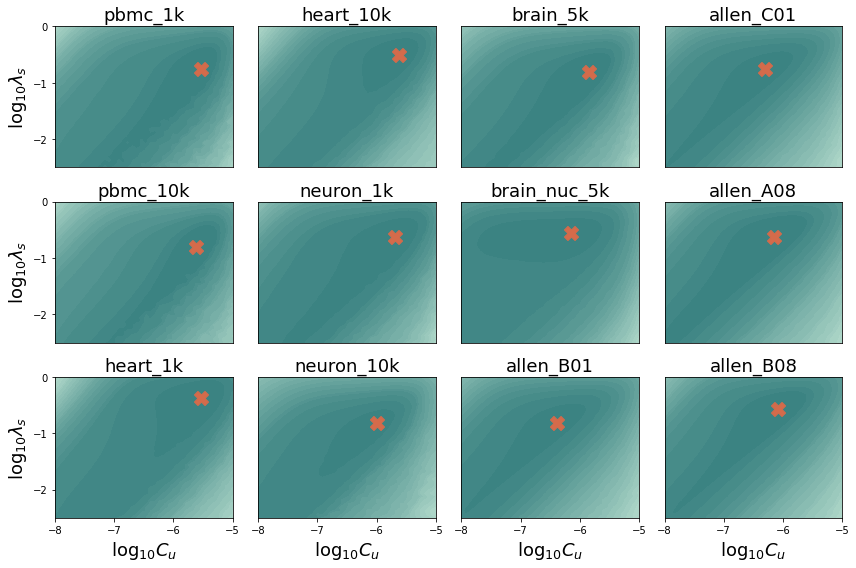

In [27]:
fig1, ax1 = plt.subplots(nrows=3,ncols=4,figsize=(12,8))
fs=18
for i in loomind:    
    result_data = import_precomputed_(result_files[i],result_filedir)
    ax_ = np.unravel_index(i,(3,4),order='F')
    plot_landscape_(ax1[ax_],result_data,cmap=cmap)
    ax1[ax_].scatter(result_data.best_samp_params[0],result_data.best_samp_params[1],marker='X',s=200,color=c_highlight)
    PAR[i,:]=result_data.best_samp_params
    if ax_[1]>0:
        ax1[ax_].set_yticks([])
    else:
        ax1[ax_].set_yticks([-2,-1,0])
        ax1[ax_].set_ylabel(r'$\log_{10} \lambda_s$',fontsize=fs)
    if ax_[0]<2:
        ax1[ax_].set_xticks([])
    else:
        ax1[ax_].set_xlabel(r'$\log_{10} C_u$',fontsize=fs)
    ax1[ax_].set_title(dataset_names[i],fontsize=fs)

        
fig1.tight_layout()
fig1.savefig('./'+figdir+'/all_landscapes.png',dpi=600)

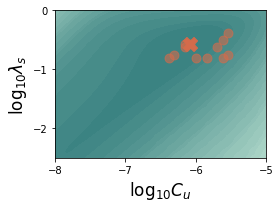

In [31]:
fig1, ax1 = plt.subplots(figsize=(4,3))
fs=17
plot_landscape_(ax1,result_data,cmap=cmap)
ax1.scatter(PAR[:,0],PAR[:,1],color=c_highlight,s=80,alpha=0.6)
ax1.scatter(result_data.best_samp_params[0],result_data.best_samp_params[1],marker='X',s=200,color=c_highlight)
#     if ax_[1]>0:
#         ax1[ax_].set_yticks([])
#     else:
ax1.set_yticks([-2,-1,0])
ax1.set_xticks([-8,-7,-6,-5])
ax1.set_ylabel(r'$\log_{10} \lambda_s$',fontsize=fs)
ax1.set_xlabel(r'$\log_{10} C_u$',fontsize=fs)

        
fig1.tight_layout()
fig1.savefig('./'+figdir+'/allen_landscape.png',dpi=600)

In [32]:
print((np.max(PAR,0)-np.min(PAR,0))/2)
print((np.max(PAR,0)+np.min(PAR,0))/2)

[0.42307692 0.21875   ]
[-5.96153846 -0.59375   ]


## Plot 2D mRNA count distributions.

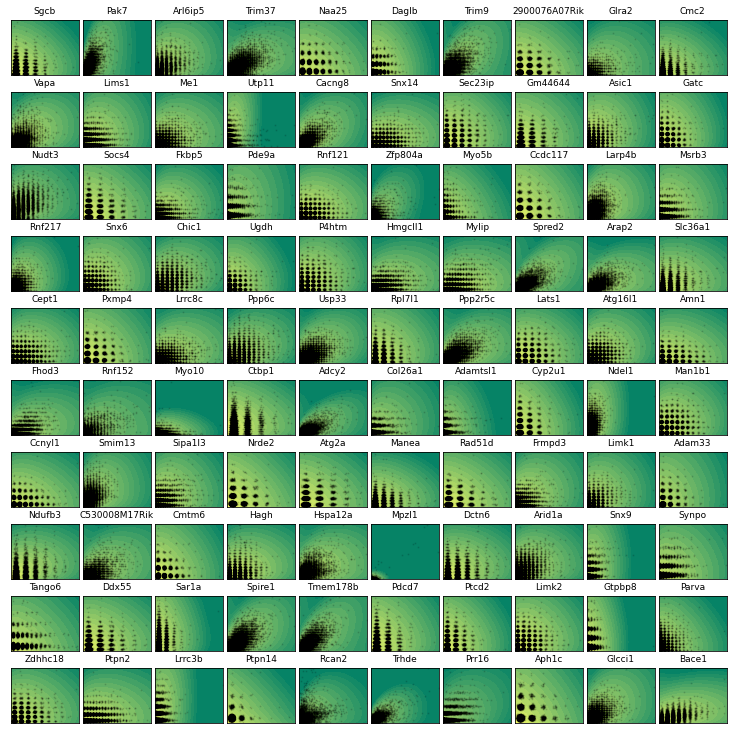

In [95]:
plot_genes(result_data,(10,10),(10,10),marg='none',log=True,title=True,nosamp=False,NGEN_PLOT=100)

In [33]:
def plot_genes_(result_data,sz,figsize,marg='none',log=False,title=True,nosamp=False,NGEN_PLOT=None,cmap='summer'):
    (nrows,ncols)=sz
    fig1,ax1=plt.subplots(nrows=nrows,ncols=ncols,figsize=figsize)
    if NGEN_PLOT is None:
        NGEN_PLOT = np.prod(sz)
    for i_ in range(NGEN_PLOT):
        lm = [result_data.M[i_],result_data.N[i_]]
        axis_location = np.unravel_index(i_,sz)
        
        samp = None if nosamp else result_data.gene_spec_samp_params[i_]
        Pa = np.squeeze(cme_integrator(result_data.best_phys_params[i_],lm,samp))

        if log and marg == 'none':
            Pa[Pa<1e-8]=1e-8
            Pa = np.log10(Pa)
        ax1[axis_location].set_xticks([])
        ax1[axis_location].set_yticks([])
        if marg=='none':
            X_,Y_ = np.meshgrid(np.arange(result_data.M[i_])-0.5,
                                np.arange(result_data.N[i_])-0.5)
            ax1[axis_location].contourf(X_.T,Y_.T,Pa,20,cmap=cmap)
            jitter_magn = 0.1
            jitter_x = np.random.randn(result_data.Ncells)*jitter_magn
            jitter_y = np.random.randn(result_data.Ncells)*jitter_magn
            ax1[axis_location].scatter(result_data.raw_U[i_]+jitter_x,
                                       result_data.raw_S[i_]+jitter_y,c='k',s=1,alpha=0.1)
            
            ax1[axis_location].set_xlim([-0.5,result_data.M[i_]-1.5])
            ax1[axis_location].set_ylim([-0.5,result_data.N[i_]-1.5])
            ax1[axis_location].text(.05,.8,result_data.gene_names[i_],transform=ax1[axis_location].transAxes,fontsize=25)
        fs=20
        if axis_location[0]==1:
            ax1[axis_location].set_xlabel('Unspliced',fontsize=fs)
        if axis_location[1]==0:
            ax1[axis_location].set_ylabel('Spliced',fontsize=fs)
    fig1.tight_layout(pad=0.02)

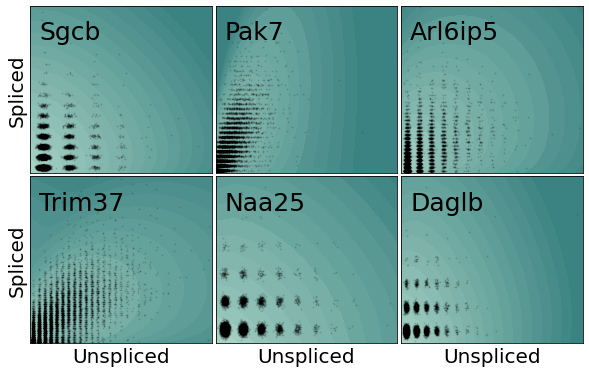

In [34]:
plot_genes_(result_data,(2,3),(8,5),log=True,cmap=cmap)
plt.gcf().savefig('./'+figdir+'/allen_gene_count_hist.png',dpi=600)

## Plot and fit marginal parameter distributions.

/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


pbmc_1k: 7.9% fits rejected. b: 0.67 (0.46). beta: 0.21 (0.41). gamma: 0.43 (0.50). C_u: -5.54. lambda_s: -0.75.
pbmc_10k: 11.6% fits rejected. b: 0.81 (0.42). beta: 0.22 (0.36). gamma: 0.50 (0.47). C_u: -5.62. lambda_s: -0.81.
heart_1k: 7.6% fits rejected. b: 1.07 (0.39). beta: 0.52 (0.39). gamma: 1.06 (0.43). C_u: -5.54. lambda_s: -0.38.
heart_10k: 14.6% fits rejected. b: 1.00 (0.38). beta: 0.45 (0.42). gamma: 0.97 (0.43). C_u: -5.62. lambda_s: -0.50.
neuron_1k: 17.1% fits rejected. b: 0.84 (0.41). beta: 0.21 (0.46). gamma: 0.59 (0.52). C_u: -5.69. lambda_s: -0.62.
neuron_10k: 7.0% fits rejected. b: 0.84 (0.40). beta: 0.12 (0.48). gamma: 0.58 (0.54). C_u: -6.00. lambda_s: -0.81.
brain_5k: 12.8% fits rejected. b: 0.81 (0.39). beta: 0.13 (0.47). gamma: 0.54 (0.55). C_u: -5.85. lambda_s: -0.81.
brain_nuc_5k: 50.6% fits rejected. b: 1.23 (0.34). beta: 0.47 (0.46). gamma: 1.74 (0.51). C_u: -6.15. lambda_s: -0.56.
allen_B01: 4.6% fits rejected. b: 1.48 (0.35). beta: 0.00 (0.30). gamma: 0.8

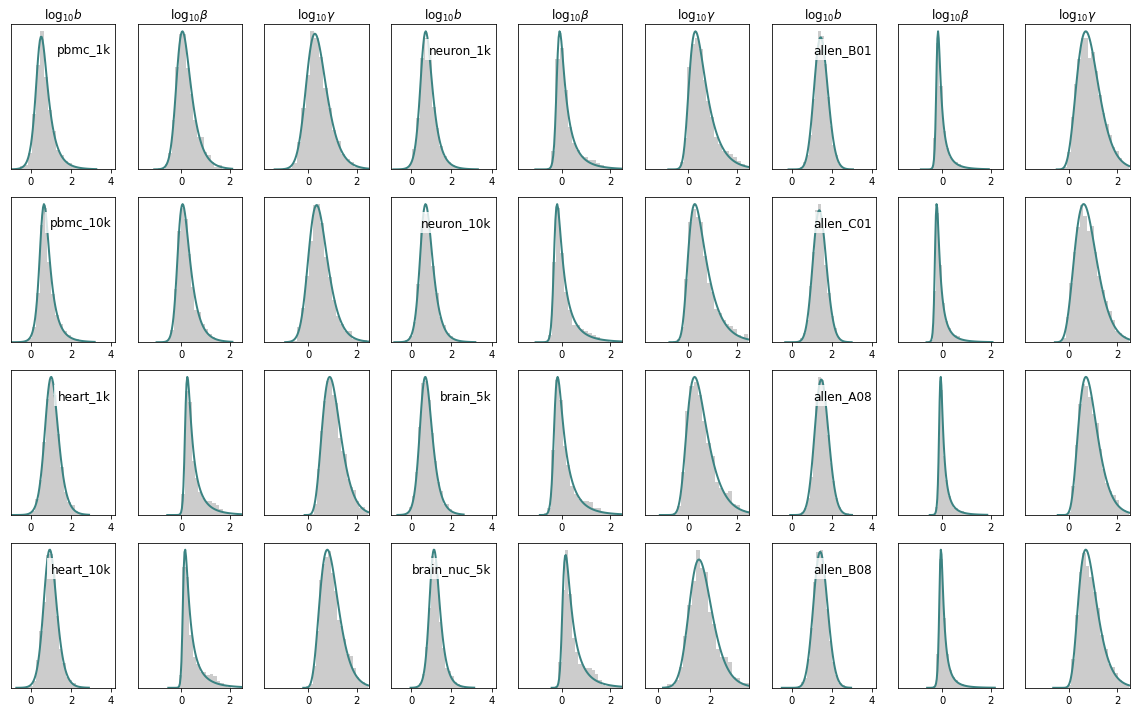

In [163]:
from scipy.stats import *
pr = norminvgauss

fig1, ax1 = plt.subplots(nrows=4,ncols=9,figsize=(16,10))
fits_ = np.zeros((12,3,4))
for i in loomind:    
    result_data = import_precomputed_(result_files[i],result_filedir)

    if i<4:
        ax_b = np.unravel_index(i,(4,9),order='F')
    if i>=4 and i<8:
        ax_b = np.unravel_index(i+8,(4,9),order='F')
    if i>=8:
        ax_b = np.unravel_index(i+16,(4,9),order='F')
    ax_beta = list(ax_b)
    ax_beta[1] += 1
    ax_beta = tuple(ax_beta)
    ax_gamma = list(ax_b)
    ax_gamma[1] += 2
    ax_gamma = tuple(ax_gamma)
    ax_ = [ax_b,ax_beta,ax_gamma]

    filt = result_data.gene_rej | check_at_bounds(result_data,result_data.best_phys_params)

    nbin=20

    summ = np.zeros((3,2))
    for j in range(3):
        DATA = result_data.best_phys_params[~filt,j]
        LB = result_data.search_params.lb_log[j]
        UB = result_data.search_params.ub_log[j]
        ax1[ax_[j]].hist(DATA,nbin,density=True,facecolor=[0.8]*3)
        xmin, xmax = ax1[ax_[j]].get_xlim()
        x = np.linspace(xmin, xmax, 100)

        A = pr.fit(DATA)
        fits_[i,j,:]=A
        p = pr.pdf(x,*A)
        ax1[ax_[j]].plot(x, p, '-', color=c2,linewidth=2)
        

        
        ax1[ax_[j]].set_xlim([LB,UB])
        ax1[ax_[j]].set_yticks([])
        summ[j,0] = np.mean(DATA)
        summ[j,1] = np.std(DATA)
        
    print('{}: {:.1%} fits rejected. b: {:.2f} ({:.2f}). beta: {:.2f} ({:.2f}). gamma: {:.2f} ({:.2f}). C_u: {:.2f}. lambda_s: {:.2f}.'.format(\
         dataset_names[i], sum(filt)/result_data.n_gen,summ[0,0],summ[0,1],summ[1,0],summ[1,1],summ[2,0],summ[2,1],\
         result_data.best_samp_params[0],result_data.best_samp_params[1]))
        
    ax1[ax_[0]].text(.96,.8,dataset_names[i],transform=ax1[ax_[0]].transAxes,fontsize=12,ha='right',\
                    bbox=dict(facecolor='white', alpha=0.8,edgecolor=None,lw=0))
    param_nm = (r'$\log_{10} b$',r'$\log_{10} \beta$',r'$\log_{10} \gamma$')
    if ax_[0][0] == 0:
        for j in range(3):
            ax1[ax_[j]].set_title(param_nm[j])
        
fig1.tight_layout()
fig1.savefig('./'+figdir+'/full_fit_hist.png',dpi=600)

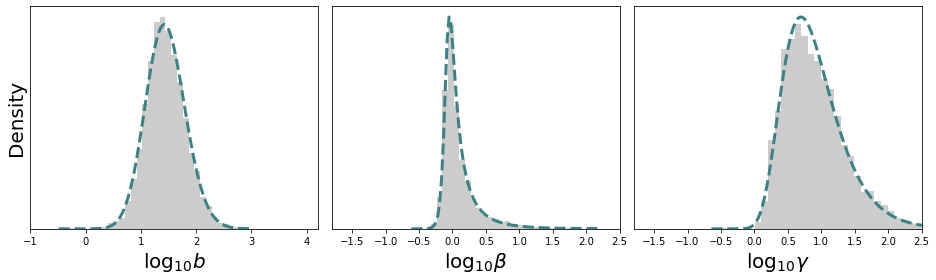

In [64]:
fig1, ax1 = plt.subplots(nrows=1,ncols=3,figsize=(13,4))
nbin=30
for j in range(3):
    DATA = result_data.best_phys_params[~filt,j]
    LB = result_data.search_params.lb_log[j]
    UB = result_data.search_params.ub_log[j]
    ax1[j].hist(DATA,nbin,density=True,facecolor=[0.8]*3)
    xmin, xmax = ax1[j].get_xlim()
    x = np.linspace(xmin, xmax, 100)

    A = pr.fit(DATA)
    p = pr.pdf(x,*A)
    ax1[j].plot(x, p, '--', color=c2,linewidth=3)

    ax1[j].set_xlim([LB,UB])

    fs=20
    if j==0:
        ax1[j].set_ylabel('Density',fontsize=fs)
    ax1[j].set_xlabel(param_nm[j],fontsize=fs)
    ax1[j].set_yticks([])
fig1.tight_layout()
fig1.savefig('./'+figdir+'/allen_full_fit_hist.png',dpi=600)

## Plot results of technical and biological replicates.

In [38]:
dataset_names

/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['pbmc_1k',
 'pbmc_10k',
 'heart_1k',
 'heart_10k',
 'neuron_1k',
 'neuron_10k',
 'brain_5k',
 'brain_nuc_5k',
 'allen_B01',
 'allen_C01',
 'allen_A08',
 'allen_B08']

In [39]:
tech_rep_pairs = [[0,1],[2,3],[4,5],[8,9],[10,11]]

gg_210610_pbmc_1k_v3_40x41_2500gen_1
gg_210610_pbmc_10k_v3_40x41_2500gen_1
gg_210610_heart_1k_v3_40x41_2500gen_1
gg_210610_heart_10k_v3_40x41_2500gen_1
gg_210610_neuron_1k_v3_40x41_2500gen_1
gg_210610_neuron_10k_v3_40x41_2500gen_1
gg_210610_allen_B01_raw_40x41_5000gen_1
gg_210611_allen_C01_raw_40x41_5000gen_1
gg_210611_allen_A08_raw_40x41_5000gen_1
gg_210612_allen_B08_raw_40x41_5000gen_1


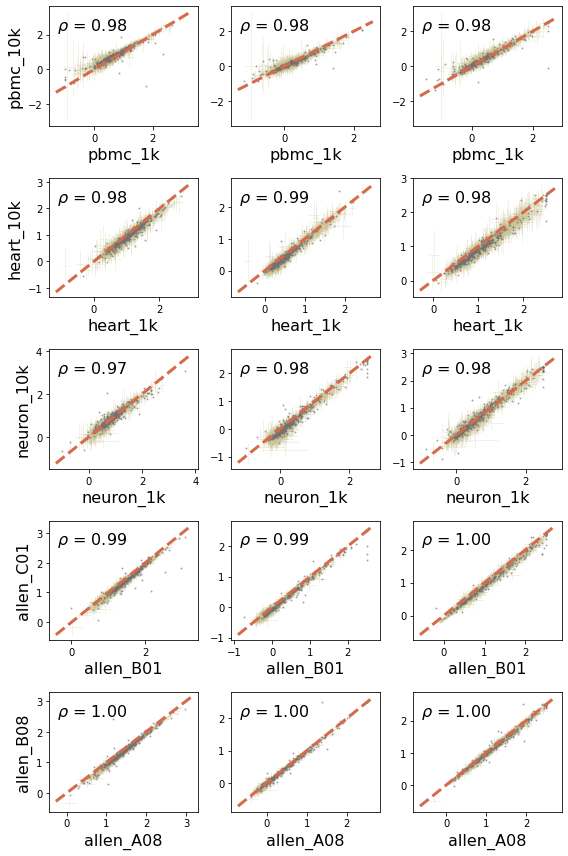

In [40]:
ms,lw,ms_fail,alf,alf_fail = sifig_aesth
markerstyle = None
fig1, ax1 = plt.subplots(nrows=5,ncols=3,figsize=(8,12))
nbin=30
for i in range(5):
    K = tech_rep_pairs[i]
    print(result_files[K[0]])
    res1 = import_precomputed_(result_files[K[0]],result_filedir)

    print(result_files[K[1]])
    res2 = import_precomputed_(result_files[K[1]],result_filedir)

    err1 = res1.sigma*2.576
    err2 = res2.sigma*2.576
    
    for j in range(3):
        filt = ~res1.gene_rej & ~res2.gene_rej \
            & ~check_at_bounds(res1,res1.best_phys_params)\
            & ~check_at_bounds(res2,res2.best_phys_params)
        ax1[i,j].errorbar(res1.best_phys_params[filt,j],
            res2.best_phys_params[filt,j],
            err1[filt,j],err2[filt,j],marker=markerstyle,ms=ms,c=col_gold,alpha=alf,linestyle='None',linewidth=lw,zorder=-100)
        ax1[i,j].scatter(res1.best_phys_params[~filt,j],
                   res2.best_phys_params[~filt,j],color=col_gray,alpha=alf_fail,s=ms_fail)

        fs=16
        rho=np.corrcoef(res1.best_phys_params[filt,j],res2.best_phys_params[filt,j])[0][1]
        xl = ax1[i,j].get_xlim()
        ax1[i,j].plot(xl,xl,'--',color=c_highlight,linewidth=3)
        ax1[i,j].set_xlabel(dataset_names[K[0]],fontsize=fs)

        if j==0:
            ax1[i,j].set_ylabel(dataset_names[K[1]],fontsize=fs)
        ax1[i,j].text(.05,.8,r'$\rho$ = {:.2f}'.format(rho),fontsize=fs,transform=ax1[i,j].transAxes)

fig1.tight_layout()
fig1.savefig('./'+figdir+'/tech_replicates_all.png',dpi=600)


/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


gg_210611_allen_A08_raw_40x41_5000gen_1
gg_210612_allen_B08_raw_40x41_5000gen_1


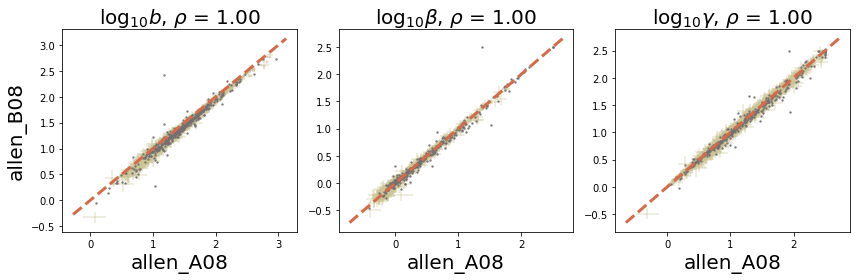

In [41]:
ms,lw,ms_fail,alf,alf_fail = msfig_aesth
K = tech_rep_pairs[4]
print(result_files[K[0]])
res1 = import_precomputed_(result_files[K[0]],result_filedir)

print(result_files[K[1]])
res2 = import_precomputed_(result_files[K[1]],result_filedir)

err1 = res1.sigma*2.576
err2 = res2.sigma*2.576
    

fig1, ax1 = plt.subplots(nrows=1,ncols=3,figsize=(12,4))
nbin=30
for j in range(3):
    filt = ~res1.gene_rej & ~res2.gene_rej \
        & ~check_at_bounds(res1,res1.best_phys_params)\
        & ~check_at_bounds(res2,res2.best_phys_params)

    ax1[j].errorbar(res1.best_phys_params[filt,j],
        res2.best_phys_params[filt,j],
        err1[filt,j],err2[filt,j],marker=markerstyle,ms=ms,c=col_gold,alpha=alf,linestyle='None',linewidth=lw,zorder=-100)
    ax1[j].scatter(res1.best_phys_params[~filt,j],
               res2.best_phys_params[~filt,j],color=col_gray,alpha=alf_fail,s=ms_fail)

    fs=20
    rho=np.corrcoef(res1.best_phys_params[filt,j],res2.best_phys_params[filt,j])[0][1]
    ax1[j].set_title(r'{}, $\rho$ = {:.2f}'.format(param_nm[j],rho),fontsize=fs)
    xl = ax1[j].get_xlim()
    ax1[j].plot(xl,xl,'--',color=c_highlight,linewidth=3)
    ax1[j].set_xlabel(dataset_names[K[0]],fontsize=fs)
    
    if j==0:
        ax1[j].set_ylabel(dataset_names[K[1]],fontsize=fs)

fig1.tight_layout()
fig1.savefig('./'+figdir+'/tech_replicate.png',dpi=600)


In [45]:
bio_rep_pairs = [[8,10],[8,11],[9,10],[9,11]]

/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


gg_210610_allen_B01_raw_40x41_5000gen_1
gg_210611_allen_A08_raw_40x41_5000gen_1
gg_210610_allen_B01_raw_40x41_5000gen_1
gg_210612_allen_B08_raw_40x41_5000gen_1
gg_210611_allen_C01_raw_40x41_5000gen_1
gg_210611_allen_A08_raw_40x41_5000gen_1
gg_210611_allen_C01_raw_40x41_5000gen_1
gg_210612_allen_B08_raw_40x41_5000gen_1


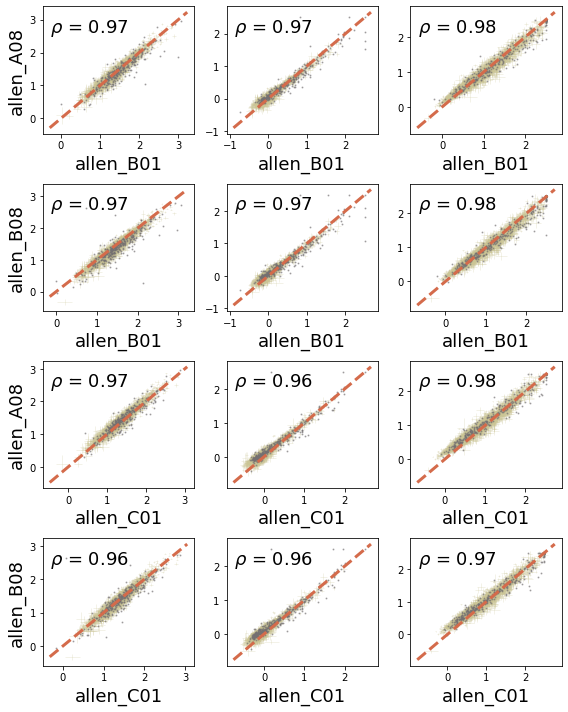

In [46]:
ms,lw,ms_fail,alf,alf_fail = sifig_aesth
fig1, ax1 = plt.subplots(nrows=4,ncols=3,figsize=(8,10))
nbin=30
for i in range(4):
    K = bio_rep_pairs[i]
    print(result_files[K[0]])
    res1 = import_precomputed_(result_files[K[0]],result_filedir)

    print(result_files[K[1]])
    res2 = import_precomputed_(result_files[K[1]],result_filedir)

    err1 = res1.sigma*2.576
    err2 = res2.sigma*2.576


    for j in range(3):
        filt = ~res1.gene_rej & ~res2.gene_rej \
            & ~check_at_bounds(res1,res1.best_phys_params)\
            & ~check_at_bounds(res2,res2.best_phys_params)
        ax1[i,j].errorbar(res1.best_phys_params[filt,j],
            res2.best_phys_params[filt,j],
            err1[filt,j],err2[filt,j],marker=markerstyle,ms=ms,c=col_gold,alpha=alf,linestyle='None',linewidth=lw,zorder=-100)
        ax1[i,j].scatter(res1.best_phys_params[~filt,j],
                   res2.best_phys_params[~filt,j],color=col_gray,alpha=alf_fail,s=ms_fail)


        fs=18
        rho=np.corrcoef(res1.best_phys_params[filt,j],res2.best_phys_params[filt,j])[0][1]
        xl = ax1[i,j].get_xlim()
        ax1[i,j].plot(xl,xl,'--',color=c_highlight,linewidth=3)
        ax1[i,j].set_xlabel(dataset_names[K[0]],fontsize=fs)

        if j==0:
            ax1[i,j].set_ylabel(dataset_names[K[1]],fontsize=fs)
        ax1[i,j].text(.05,.8,r'$\rho$ = {:.2f}'.format(rho),fontsize=fs,transform=ax1[i,j].transAxes)

fig1.tight_layout()
fig1.savefig('./'+figdir+'/bio_replicates_all.png',dpi=600)


/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


gg_210611_allen_C01_raw_40x41_5000gen_1
gg_210612_allen_B08_raw_40x41_5000gen_1


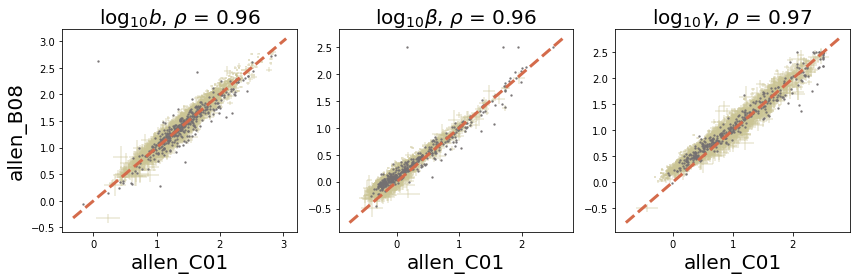

In [47]:
ms,lw,ms_fail,alf,alf_fail = msfig_aesth
K = bio_rep_pairs[3]
print(result_files[K[0]])
res1 = import_precomputed_(result_files[K[0]],result_filedir)

print(result_files[K[1]])
res2 = import_precomputed_(result_files[K[1]],result_filedir)

err1 = res1.sigma*2.576
err2 = res2.sigma*2.576



fig1, ax1 = plt.subplots(nrows=1,ncols=3,figsize=(12,4))
nbin=30
for j in range(3):
    filt = ~res1.gene_rej & ~res2.gene_rej \
        & ~check_at_bounds(res1,res1.best_phys_params)\
        & ~check_at_bounds(res2,res2.best_phys_params)

    ax1[j].errorbar(res1.best_phys_params[filt,j],
        res2.best_phys_params[filt,j],
        err1[filt,j],err2[filt,j],marker=markerstyle,ms=ms,c=col_gold,alpha=alf,linestyle='None',linewidth=lw,zorder=-100)
    ax1[j].scatter(res1.best_phys_params[~filt,j],
               res2.best_phys_params[~filt,j],color=col_gray,alpha=alf_fail,s=ms_fail)

    fs=20
    rho=np.corrcoef(res1.best_phys_params[filt,j],res2.best_phys_params[filt,j])[0][1]
    ax1[j].set_title(r'{}, $\rho$ = {:.2f}'.format(param_nm[j],rho),fontsize=fs)
    xl = ax1[j].get_xlim()
    ax1[j].plot(xl,xl,'--',color=c_highlight,linewidth=3)
    ax1[j].set_xlabel(dataset_names[K[0]],fontsize=fs)
    
    if j==0:
        ax1[j].set_ylabel(dataset_names[K[1]],fontsize=fs)

fig1.tight_layout()
fig1.savefig('./'+figdir+'/bio_replicate.png',dpi=600)


## Consider non-paired datasets from distinct tissues

/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


gg_210610_heart_10k_v3_40x41_2500gen_1
gg_210610_neuron_10k_v3_40x41_2500gen_1


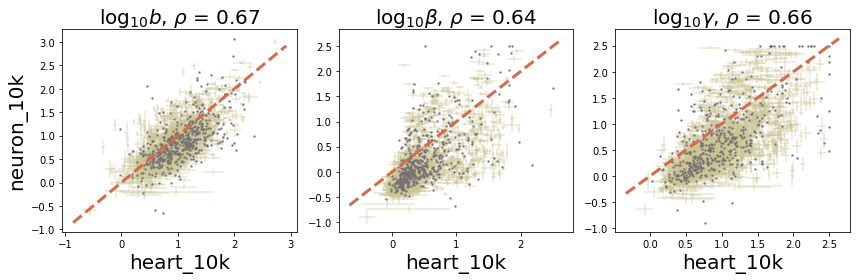

In [95]:
ms,lw,ms_fail,alf,alf_fail = msfig_aesth
K = [3,5]
markerstyle=None
print(result_files[K[0]])
res1 = import_precomputed_(result_files[K[0]],result_filedir)

print(result_files[K[1]])
res2 = import_precomputed_(result_files[K[1]],result_filedir)

err1 = res1.sigma*2.576
err2 = res2.sigma*2.576
param_nm = (r'$\log_{10} b$',r'$\log_{10} \beta$',r'$\log_{10} \gamma$')



fig1, ax1 = plt.subplots(nrows=1,ncols=3,figsize=(12,4))
nbin=30
for j in range(3):
    filt = ~res1.gene_rej & ~res2.gene_rej \
        & ~check_at_bounds(res1,res1.best_phys_params)\
        & ~check_at_bounds(res2,res2.best_phys_params)

    ax1[j].errorbar(res1.best_phys_params[filt,j],
        res2.best_phys_params[filt,j],
        err1[filt,j],err2[filt,j],marker=markerstyle,ms=ms,c=col_gold,alpha=alf,linestyle='None',linewidth=lw,zorder=-100)
    ax1[j].scatter(res1.best_phys_params[~filt,j],
               res2.best_phys_params[~filt,j],color=col_gray,alpha=alf_fail,s=ms_fail)

    fs=20
    rho=np.corrcoef(res1.best_phys_params[filt,j],res2.best_phys_params[filt,j])[0][1]
    ax1[j].set_title(r'{}, $\rho$ = {:.2f}'.format(param_nm[j],rho),fontsize=fs)
    xl = ax1[j].get_xlim()
    ax1[j].plot(xl,xl,'--',color=c_highlight,linewidth=3)
    ax1[j].set_xlabel(dataset_names[K[0]],fontsize=fs)
    
    if j==0:
        ax1[j].set_ylabel(dataset_names[K[1]],fontsize=fs)

fig1.tight_layout()
fig1.savefig('./'+figdir+'/heart_brain.png',dpi=600)


## Check the correlation between poly(A) sequences and length. 

In [48]:
annfile = ('gg_200525_genome_polyA_cum_3','gg_200524_mouse_genome_polyA_cum_1')

/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


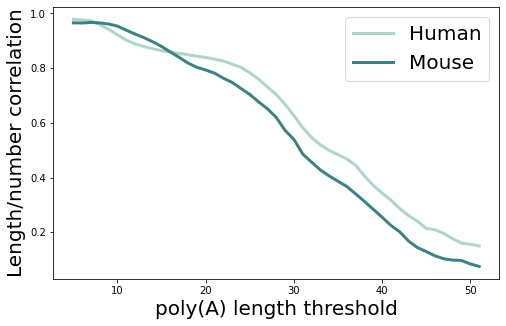

In [49]:
fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(8,5))
leg=('Human','Mouse')
col_corr = [c1,c2]
for j in range(2):
    T1 = np.genfromtxt(fname=annfile[j],dtype=int)
    len = T1[:,1]
    polyA = T1[:,2:]
    nPolyA = np.arange(5,52)
    Corr = [np.corrcoef(len,polyA[:,i])[0][1] for i in range(polyA.shape[1])]
    # ax = plt.subplot(111)
    fs=20
    ax.plot(nPolyA,Corr,label=leg[j],linewidth=3,color=col_corr[j])
    ax.set_xlabel('poly(A) length threshold',fontsize=fs)
    ax.set_ylabel('Length/number correlation',fontsize=fs)
    ax.legend(fontsize=fs)

plt.savefig('./'+figdir+'/polyA_corr.png',dpi=600)

## Investigate impact of MoM initialization.

In [96]:
MoM_result_files = [\
                'gg_210523_pbmc_10k_v3_22x23_1000gen_1',\
                'gg_210523_pbmc_10k_v3_22x23_1000gen_2',\
                'gg_210523_pbmc_10k_v3_22x23_1000gen_3',\
                'gg_210524_pbmc_10k_v3_22x23_1000gen_4',\
               ]

/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


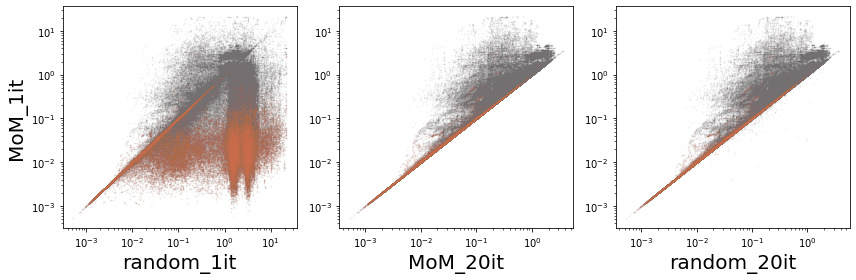

In [97]:
MoM_rep_pairs = [[1,0],[2,0],[3,0]]
MoM_dataset_names = ('MoM_1it','random_1it','MoM_20it','random_20it')
fig1, ax1 = plt.subplots(nrows=1,ncols=3,figsize=(12,4))

result_data = import_datasets([MoM_result_files[2]+'/result.pickle'])
filt_divg = result_data.divg<np.quantile(result_data.divg,0.25)

for i in range(3):
    K = MoM_rep_pairs[i]
    res1 = import_datasets([MoM_result_files[K[0]]+'/result.pickle'])
    res2 = import_datasets([MoM_result_files[K[1]]+'/result.pickle'])
    
    ax1[i].loglog(res1.gene_spec_err.flatten(),res2.gene_spec_err.flatten(),'.',color=[116/255,112/255,113/255],alpha=0.1,markersize=1)
    ax1[i].loglog(res1.gene_spec_err[filt_divg,:].flatten(),res2.gene_spec_err[filt_divg,:].flatten(),'.',color=c_highlight,alpha=0.1,markersize=1)

    ax1[i].set_xlabel(MoM_dataset_names[K[0]],fontsize=fs)
    if i==0:
        ax1[i].set_ylabel(MoM_dataset_names[K[1]],fontsize=fs)

fig1.tight_layout()
fig1.savefig('./'+figdir+'/MoM_divg.png',dpi=600)

## Consider the length-independent model.

In [146]:
result_data = import_datasets(['gg_210628_pbmc_10k_v3_22x23_1000gen_4/result.pickle']) 

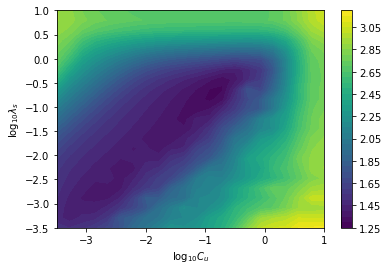

In [147]:
landscape_viz(result_data,log=True)

In [153]:
result_data.find_best_params()
#compute chi-square test rejections at sampling parameter optimum
_=chisq_gen(result_data,viz=False,nosamp=False)
#compute error bars
compute_sigma(result_data,nosamp=False)

/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Parameter set 567 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 744 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 898 gives negative stdev; replaced with mean. (Search converged to local minimum?)


../velocity-parameter-estimation/seq_cme_inference.py:384: RuntimeWarning: invalid value encountered in sqrt
  errorbars[i,:] = c*np.sqrt(np.diag(hess_inv))/np.sqrt(result_data.Ncells)


In [156]:
result_data.best_samp_params

/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(-0.9285714285714288, -0.8409090909090908)

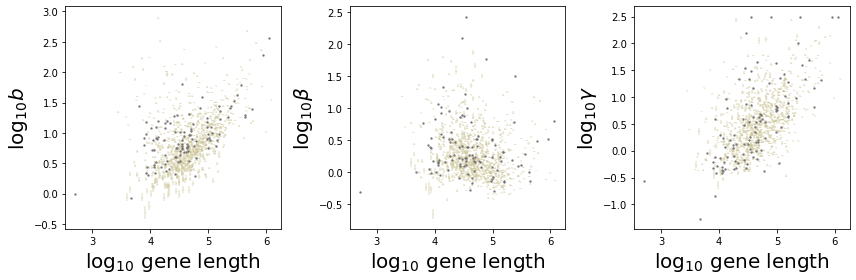

In [155]:
ms,lw,ms_fail,alf,alf_fail = msfig_aesth
fig1, ax1 = plt.subplots(nrows=1,ncols=3,figsize=(12,4))

bind,_,_,phys_params,_,gene_log_lengths,errorbars = get_result_data(result_data,chisq_correct=False,nosamp=False,get_errorbars=True)
filt = result_data.gene_rej | check_at_bounds(result_data,result_data.best_phys_params)

for j in range(3):
    ax1[j].errorbar(gene_log_lengths[~filt],
        phys_params[~filt,j],
        errorbars[~filt,j],marker='_',ms=ms,c=col_gold,alpha=alf,linestyle='None',linewidth=lw,zorder=-100)
    ax1[j].scatter(gene_log_lengths[filt],phys_params[filt,j],color=col_gray,alpha=alf_fail,s=ms_fail,zorder=100)
    fs=20
    ax1[j].set_ylabel(param_nm[j],fontsize=fs)
    ax1[j].set_xlabel(r'$\log_{10}$ gene length',fontsize=fs)
fig1.tight_layout()
fig1.savefig('./'+figdir+'/nolength_fit.png',dpi=600)

## Check nucleus data.

In [54]:
result_files

/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['gg_210610_pbmc_1k_v3_40x41_2500gen_1',
 'gg_210610_pbmc_10k_v3_40x41_2500gen_1',
 'gg_210610_heart_1k_v3_40x41_2500gen_1',
 'gg_210610_heart_10k_v3_40x41_2500gen_1',
 'gg_210610_neuron_1k_v3_40x41_2500gen_1',
 'gg_210610_neuron_10k_v3_40x41_2500gen_1',
 'gg_210622_brain_5k_40x41_3500gen_1',
 'gg_210622_brain_nuc_5k_40x41_3500gen_1',
 'gg_210610_allen_B01_raw_40x41_5000gen_1',
 'gg_210611_allen_C01_raw_40x41_5000gen_1',
 'gg_210611_allen_A08_raw_40x41_5000gen_1',
 'gg_210612_allen_B08_raw_40x41_5000gen_1']

/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


gg_210622_brain_5k_40x41_3500gen_1
gg_210622_brain_nuc_5k_40x41_3500gen_1


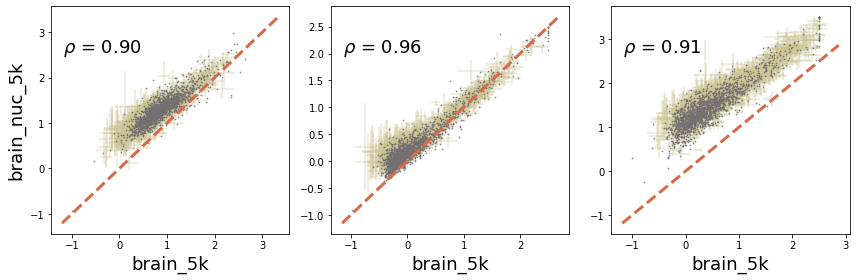

In [58]:
ms,lw,ms_fail,alf,alf_fail = msfig_aesth
K = [6,7]
fig1, ax1 = plt.subplots(nrows=1,ncols=3,figsize=(12,4))
nbin=30
print(result_files[K[0]])
res1 = import_precomputed_(result_files[K[0]],result_filedir)

print(result_files[K[1]])
res2 = import_precomputed_(result_files[K[1]],result_filedir)

err1 = res1.sigma*2.576
err2 = res2.sigma*2.576


for j in range(3):
    filt = ~res1.gene_rej & ~res2.gene_rej \
        & ~check_at_bounds(res1,res1.best_phys_params)\
        & ~check_at_bounds(res2,res2.best_phys_params)

    ax1[j].errorbar(res1.best_phys_params[filt,j],
        res2.best_phys_params[filt,j],
        err1[filt,j],err2[filt,j],marker=markerstyle,ms=ms,c=col_gold,alpha=alf,linestyle='None',linewidth=lw,zorder=-100)
    ax1[j].scatter(res1.best_phys_params[~filt,j],
               res2.best_phys_params[~filt,j],color=col_gray,alpha=alf_fail,s=ms_fail,marker='.',edgecolors=None)

    fs=18
    rho=np.corrcoef(res1.best_phys_params[filt,j],res2.best_phys_params[filt,j])[0][1]
    xl = ax1[j].get_xlim()
    ax1[j].plot(xl,xl,'--',color=c_highlight,linewidth=3)
    ax1[j].set_xlabel(dataset_names[K[0]],fontsize=fs)

    if j==0:
        ax1[j].set_ylabel(dataset_names[K[1]],fontsize=fs)
    ax1[j].text(.05,.8,r'$\rho$ = {:.2f}'.format(rho),fontsize=fs,transform=ax1[j].transAxes)

fig1.tight_layout()
fig1.savefig('./'+figdir+'/nuc_replicates.png',dpi=600)


/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


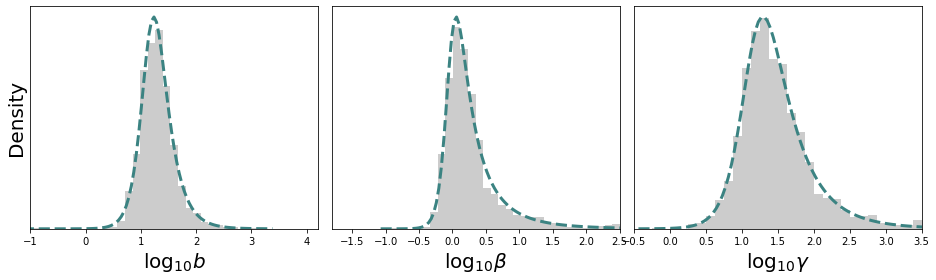

In [56]:
fig1, ax1 = plt.subplots(nrows=1,ncols=3,figsize=(13,4))
nbin=30
fit_nuc = []
for j in range(3):
    DATA = res2.best_phys_params[~filt,j]
    LB = res2.search_params.lb_log[j]
    UB = res2.search_params.ub_log[j]
    ax1[j].hist(DATA,nbin,density=True,facecolor=[0.8]*3)
    xmin, xmax = ax1[j].get_xlim()
    x = np.linspace(xmin, xmax, 100)

    A = pr.fit(DATA)
    fit_nuc.append(A)
    p = pr.pdf(x,*A)
    ax1[j].plot(x, p, '--', color=c2,linewidth=3)

    ax1[j].set_xlim([LB,UB])

    fs=20
    if j==0:
        ax1[j].set_ylabel('Density',fontsize=fs)
    ax1[j].set_xlabel(param_nm[j],fontsize=fs)
    ax1[j].set_yticks([])
fig1.tight_layout()


/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


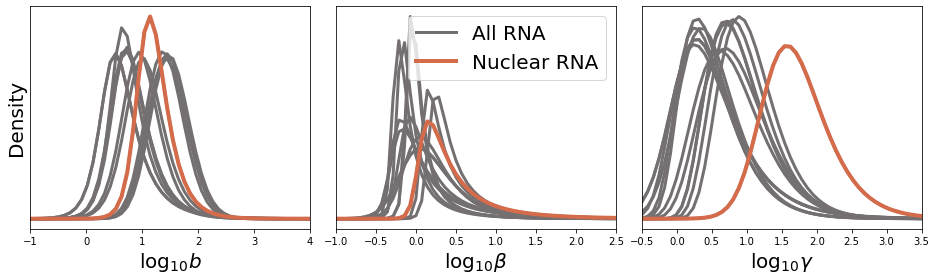

In [61]:
fig1, ax1 = plt.subplots(nrows=1,ncols=3,figsize=(13,4))
nbin=30
lims = [[-1,4],[-1,2.5],[-0.5,3.5]]
for j in range(3):
    x = np.linspace(lims[j][0],lims[j][1])
    for i in range(12):
        A = fits_[i,j,:]
        p = pr.pdf(x,*A)
        ax1[j].plot(x, p, '-', color=col_gray,linewidth=3)
        if i==0 :
            ax1[j].plot(x, p, '-', color=col_gray,linewidth=3,label='All RNA')
    for i in range(7,8):
        A = fits_[i,j,:]
        p = pr.pdf(x,*A)
        ax1[j].plot(x,p,'-',linewidth=4,color=c_highlight,label='Nuclear RNA')
    ax1[j].set_xlim(lims[j])

    fs=20
    if j==0:
        ax1[j].set_ylabel('Density',fontsize=fs)
        
    
    ax1[j].set_xlabel(param_nm[j],fontsize=fs)
    ax1[j].set_yticks([])
    if j==1: 
        ax1[j].legend(fontsize=fs)
fig1.tight_layout()
fig1.savefig('./'+figdir+'/nuc_parameters.png',dpi=600)


### Investigate suboptimal splicing parameter fits and see if the trend is stable.

In [101]:
ind_sort_1=np.argsort(res1.divg)
ind_sort_2=np.argsort(res2.divg)

brain_5k (-5.85, -0.81), D=60.50; brain_nuc_5k (-6.15, -0.56), D=92.83
brain_5k (-5.92, -0.88), D=60.52; brain_nuc_5k (-6.08, -0.56), D=92.94
brain_5k (-5.85, -0.88), D=60.62; brain_nuc_5k (-6.23, -0.56), D=92.98
brain_5k (-5.85, -0.75), D=60.65; brain_nuc_5k (-6.31, -0.56), D=92.98
brain_5k (-5.77, -0.75), D=60.72; brain_nuc_5k (-6.23, -0.50), D=93.10
brain_5k (-5.92, -0.94), D=60.74; brain_nuc_5k (-6.38, -0.56), D=93.16
brain_5k (-5.92, -0.81), D=60.74; brain_nuc_5k (-6.15, -0.62), D=93.17
brain_5k (-6.00, -0.94), D=60.89; brain_nuc_5k (-6.15, -0.50), D=93.18
brain_5k (-6.00, -1.00), D=60.93; brain_nuc_5k (-6.31, -0.62), D=93.19
brain_5k (-6.00, -0.88), D=60.95; brain_nuc_5k (-6.23, -0.62), D=93.19


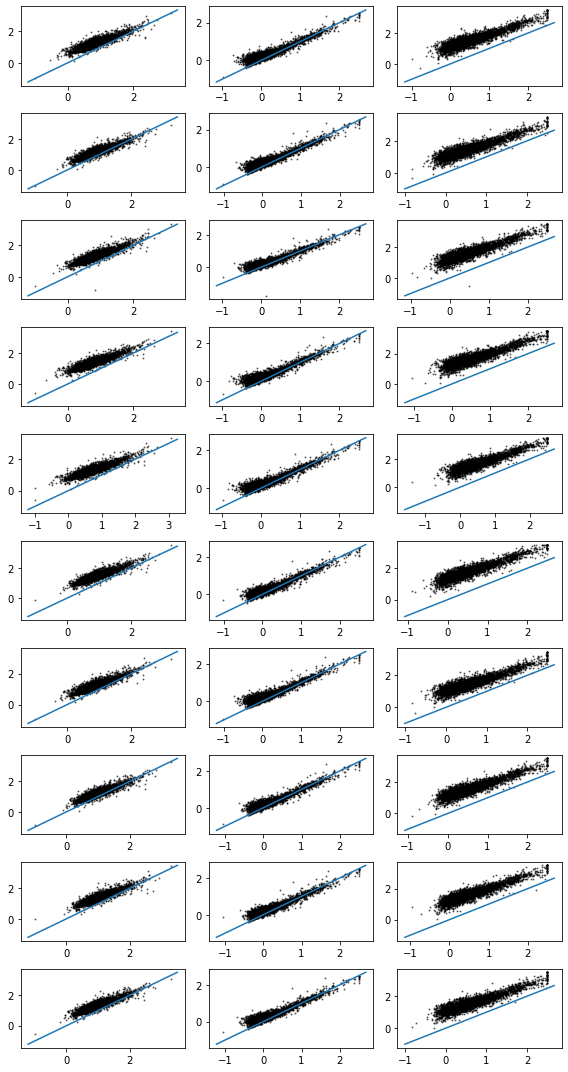

In [105]:
nr=10
fig1,ax1=plt.subplots(nrows=nr,ncols=3,figsize=(8,15))
param_nm = (r'$\log_{10} b$',r'$\log_{10} \beta$',r'$\log_{10} \gamma$')
for j in range(nr):
    for i in range(3):
        ax1[j,i].scatter(res1.gene_params[ind_sort_1[j],:,i],
                    res2.gene_params[ind_sort_2[j],:,i],c='k',s=1,alpha=0.5)
        xl = ax1[j,i].get_xlim()
        ax1[j,i].plot(xl,xl)
        rho=np.corrcoef(res1.gene_params[ind_sort_1[j],:,i],res2.gene_params[ind_sort_2[j],:,i])[0][1]
    print('{} ({:.2f}, {:.2f}), D={:.2f}; {} ({:.2f}, {:.2f}), D={:.2f}'.format(
        dataset_names[K[0]],
        *res1.sampl_vals[ind_sort_1[j]],res1.divg[ind_sort_1[j]],
        dataset_names[K[1]],
        *res2.sampl_vals[ind_sort_2[j]],res2.divg[ind_sort_2[j]]))
fig1.tight_layout()

Text(0, 0.5, 'Degradation rate')

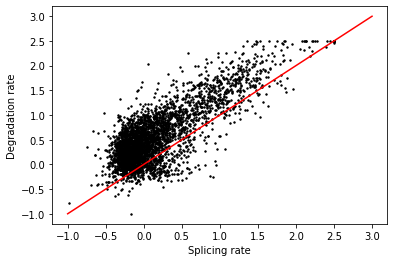

In [124]:
plt.scatter(res1.best_phys_params[:,1],res1.best_phys_params[:,2],color='k',s=2)
plt.plot([-1,3],[-1,3],'r')
plt.xlabel('Splicing rate')
plt.ylabel('Degradation rate')

Text(0, 0.5, 'Splicing rate')

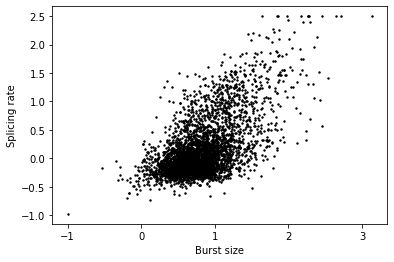

In [127]:
plt.scatter(res1.best_phys_params[:,0],res1.best_phys_params[:,1],color='k',s=2)
# plt.plot([-1,3],[-1,3],'r')
plt.xlabel('Burst size')
plt.ylabel('Splicing rate')

(0.0, 20.0)

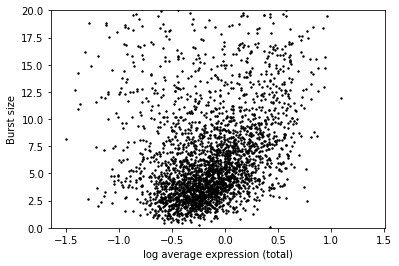

In [136]:
filt = ~res1.gene_rej 
plt.scatter(np.log10(res1.moment_data[filt,2]+res1.moment_data[filt,1]),10**res1.best_phys_params[filt,0],color='k',s=2)
# plt.plot([-1,3],[-1,3],'r')
plt.ylabel('Burst size')
plt.xlabel('log average expression (total)')
plt.ylim([0,20])

(0.0, 20.0)

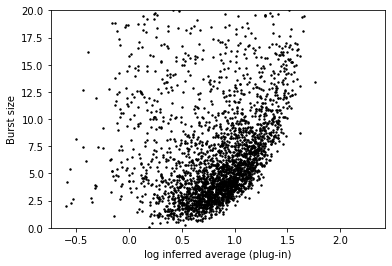

In [139]:
filt = ~res1.gene_rej 
b = 10**res1.best_phys_params[filt,0]
beta = 10**res1.best_phys_params[filt,1]
g = 10**res1.best_phys_params[filt,2]
plt.scatter(np.log10(b*(1/beta+1/g)),b,color='k',s=2)
# plt.plot([-1,3],[-1,3],'r')
plt.ylabel('Burst size')
plt.xlabel('log inferred average (plug-in)')
plt.ylim([0,20])

/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'avg S (nuclei)')

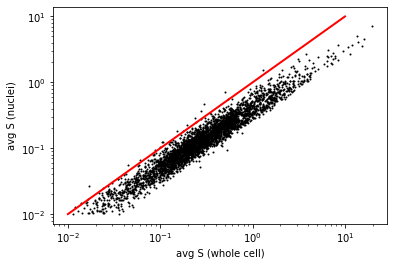

In [152]:
plt.loglog(res1.moment_data[:,2],res2.moment_data[:,2],'k.',markersize=2)
plt.plot([1e-2,10],[1e-2,10],'r-',linewidth=2)
plt.xlabel('avg S (whole cell)')
plt.ylabel('avg S (nuclei)')

/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'avg U (nuclei)')

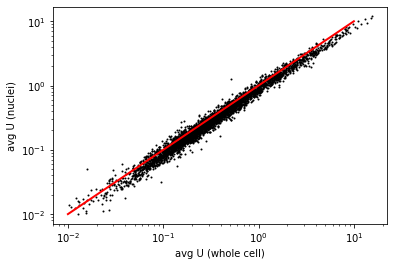

In [151]:
plt.loglog(res1.moment_data[:,1],res2.moment_data[:,1],'k.',markersize=2)
plt.plot([1e-2,10],[1e-2,10],'r-',linewidth=2)
plt.xlabel('avg U (whole cell)')
plt.ylabel('avg U (nuclei)')

/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'var U (nuclei)')

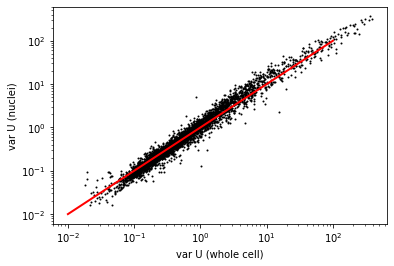

In [154]:
plt.loglog(res1.moment_data[:,0],res2.moment_data[:,0],'k.',markersize=2)
plt.plot([1e-2,100],[1e-2,100],'r-',linewidth=2)
plt.xlabel('var U (whole cell)')
plt.ylabel('var U (nuclei)')

/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'var U (whole cell)')

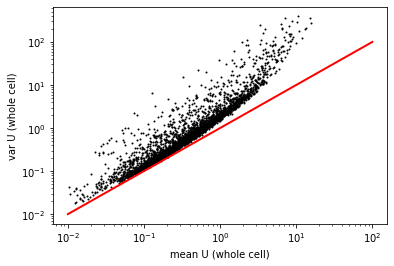

In [164]:
plt.loglog(res1.moment_data[:,1],res1.moment_data[:,0],'k.',markersize=2)
plt.plot([1e-2,100],[1e-2,100],'r-',linewidth=2)
plt.xlabel('mean U (whole cell)')
plt.ylabel('var U (whole cell)')

/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'var S (whole cell)')

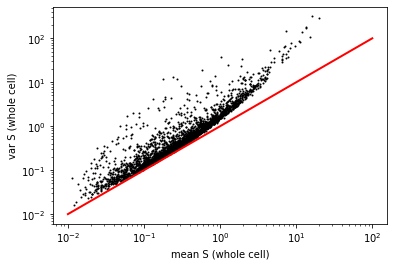

In [165]:
plt.loglog(np.mean(res1.raw_S,1),np.var(res1.raw_S,1),'k.',markersize=2)
plt.plot([1e-2,100],[1e-2,100],'r-',linewidth=2)
plt.xlabel('mean S (whole cell)')
plt.ylabel('var S (whole cell)')


/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'var U (nuc)')

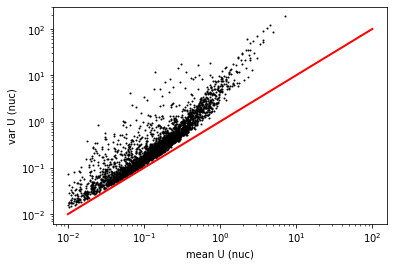

In [171]:
plt.loglog(np.mean(res2.raw_S,1),np.var(res2.raw_S,1),'k.',markersize=2)
plt.plot([1e-2,100],[1e-2,100],'r-',linewidth=2)
plt.xlabel('mean U (nuc)')
plt.ylabel('var U (nuc)')


/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'var S (nuc)')

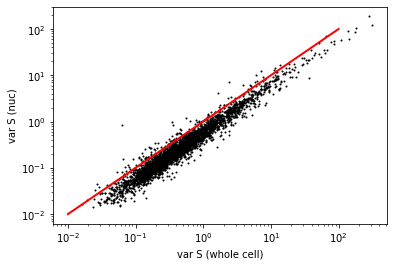

In [172]:
plt.loglog(np.var(res1.raw_S,1),np.var(res2.raw_S,1),'k.',markersize=2)
plt.plot([1e-2,100],[1e-2,100],'r-',linewidth=2)
plt.xlabel('var S (whole cell)')
plt.ylabel('var S (nuc)')
